# K224141658 _ĐÀO NGỌC HÀ _ ĐỒ ÁN CUỐI KÌ GÓI PHẦN MỀM TÀI CHÍNH 1

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
!pip install fpdf2
import datetime as dt
from fpdf import FPDF
import datetime


In [307]:
def convert_units(df, factor, start_col):
    # Xác định vị trí của cột bắt đầu chuyển đổi
    start_idx = df.columns.get_loc(start_col) + 1  # Cột tiếp theo sau start_col
    numeric_cols = df.columns[start_idx:]  # Chỉ lấy các cột từ vị trí này trở đi

    # Chỉ nhân hệ số với các cột số từ vị trí start_col trở đi
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce') / factor
    return df

# Đọc dữ liệu từ các file Excel
df1 = pd.read_excel("2020-Vietnam.xlsx", engine="openpyxl")
df2 = pd.read_excel("2021-Vietnam.xlsx", engine="openpyxl")
df3 = pd.read_excel("2022-Vietnam.xlsx", engine="openpyxl")
df4 = pd.read_excel("2023-Vietnam.xlsx", engine="openpyxl")
df5 = pd.read_excel("2024-Vietnam.xlsx", engine="openpyxl")

In [308]:
volume = pd.read_csv('df2.csv')  # Thay thế 'df2.xls' bằng đường dẫn thực tế của bạn
price = pd.read_csv('price.csv')  # Thay thế 'price.xls' bằng đường dẫn thực tế của bạn
cap = pd.read_csv('cap.csv')
view = pd.read_csv('view.csv')
change = pd.read_csv('change.csv')

In [309]:
# Xóa năm khỏi tên cột
for df, year in zip([df1, df2, df3, df4, df5], range(2020, 2025)):
    df.columns = df.columns.str.replace(f"Năm: {year}", "", regex=True).str.strip()

# Xóa đơn vị tiền tệ khỏi tên cột
for df in [df1, df2, df3, df4, df5]:
    df.columns = df.columns.str.replace(r"Đơn vị: (Tỷ|Triệu) VND", "", regex=True).str.strip()

# Xóa cụm "Hợp nhất" và "Hàng năm" khỏi tên cột
for df in [df1, df2, df3, df4, df5]:
    df.columns = df.columns.str.replace(r"\bHợp nhất\b", "", regex=True).str.strip()
    df.columns = df.columns.str.replace(r"\bQuý: Hàng năm\b", "", regex=True).str.strip()

# Xóa các cột có chứa cụm "TM" trong tên
for df in [df1, df2, df3, df4, df5]:
    df.drop(columns=[col for col in df.columns if "TM" in col], inplace=True)

# Xác định tên cột tham chiếu
start_column = "Trạng thái kiểm toán"

# Chuẩn hóa tên cột start_column trước khi sử dụng
start_column_cleaned = start_column.replace("Hợp nhất", "").replace("Hàng năm", "").strip()

# Chuyển đổi đơn vị của tất cả DataFrame từ df1 đến df3
df1 = convert_units(df1, 1e9, start_column_cleaned)
df2 = convert_units(df2, 1e9, start_column_cleaned)
df3 = convert_units(df3, 1e9, start_column_cleaned)

import pandas as pd

def standardize_columns(df):
    df = df.copy()
    df.columns = df.columns.str.strip()  # Xóa khoảng trắng đầu/cuối tên cột
    df.columns = df.columns.str.replace("\n", " ")  # Thay ký tự xuống dòng bằng khoảng trắng
    df.columns = df.columns.str.upper()  # Chuyển tất cả tên cột thành chữ hoa để đồng nhất
    return df

def merge_balance_sheets(dfs, stock_code):
    data = []
    years = list(range(2020, 2025))
    
    dfs = [standardize_columns(df) for df in dfs]  # Chuẩn hóa tất cả DataFrame trước khi xử lý
    
    for df, year in zip(dfs, years):        
        if 'MÃ' not in df.columns:
            print(f"LỖI: Cột 'MÃ' không tồn tại trong file năm {year}")
            continue
        
        stock_data = df[df['MÃ'] == stock_code]
        if not stock_data.empty:
            data.append(stock_data)
    
    if data:
        result_df = pd.concat(data, ignore_index=True)
        return result_df
    else:
        return pd.DataFrame()  

# Danh sách DataFrame đã xử lý từ các file Excel
dfs = [df1, df2, df3, df4, df5]

# Nhập mã cổ phiếu từ người dùng
stock_code = "PVS"

# Gộp dữ liệu
merged_df = merge_balance_sheets(dfs, stock_code)
merged_df = merged_df.loc[:, ~merged_df.columns.str.contains("CURRENT RATIO", case=False)]
merged_df

# Chuyển đổi DataFrame từ 5 hàng × 167 cột thành 5 cột × 167 hàng
transposed_df = merged_df.T  # Chuyển vị DataFrame
transposed_df.columns = [f"{year}" for year in range(2020, 2025)]  # Đặt tên cột theo năm
transposed_df.reset_index(inplace=True)  # Chuyển chỉ mục thành cột
transposed_df.rename(columns={"index": "Chỉ tiêu"}, inplace=True)  # Đặt tên cột cho chỉ mục

# Thay thế NaN bằng 0
transposed_df = transposed_df.fillna(0)  



In [310]:
# Nhãn của các chỉ tiêu cần lấy
cash_equivalents_label = "CĐKT. TIỀN VÀ TƯƠNG ĐƯƠNG TIỀN"
short_term_investments_label = "CĐKT. ĐẦU TƯ TÀI CHÍNH NGẮN HẠN"
short_term_receivables_label = "CĐKT. CÁC KHOẢN PHẢI THU NGẮN HẠN"
inventory_label = "CĐKT. HÀNG TỒN KHO, RÒNG"
other_current_assets_label = "CĐKT. TÀI SẢN NGẮN HẠN KHÁC"

# Hàm lấy giá trị từ transposed_df
def get_values(label):
    row = transposed_df[transposed_df["Chỉ tiêu"] == label]
    return row.iloc[:, 1:].values.flatten() if not row.empty else np.zeros(len(transposed_df.columns[1:]))

# Lấy dữ liệu từng chỉ tiêu (nếu không có thì thay bằng mảng 0)
cash_equivalents = get_values(cash_equivalents_label)
short_term_investments = get_values(short_term_investments_label)
short_term_receivables = get_values(short_term_receivables_label)
inventory = get_values(inventory_label)
other_current_assets = get_values(other_current_assets_label)

# Tính Total Current Assets
total_current_assets = cash_equivalents + short_term_investments + short_term_receivables + inventory + other_current_assets

# Lấy danh sách các năm
years = transposed_df.columns[1:]

print("Total Current Assets (2020-2024):")
for year, value in zip(years, total_current_assets):
    formatted_total_current_assets = f"{value:,.2f}"  # Định dạng số
    print(f"{year}: {formatted_total_current_assets}")

import numpy as np

# Nhãn của các chỉ tiêu cần lấy
tangible_assets_label = "CĐKT. GTCL TSCĐ HỮU HÌNH"
finance_leased_assets_label = "CĐKT. GTCL TÀI SẢN THUÊ TÀI CHÍNH"
intangible_assets_label = "CĐKT. GTCL TÀI SẢN CỐ ĐỊNH VÔ HÌNH"
construction_in_progress_label = "CĐKT. XÂY DỰNG CƠ BẢN DỞ DANG (TRƯỚC 2015)"

# Hàm lấy giá trị từ transposed_df
def get_values(label):
    row = transposed_df[transposed_df["Chỉ tiêu"] == label]
    return row.iloc[:, 1:].values.flatten() if not row.empty else np.zeros(len(transposed_df.columns[1:]))

# Lấy dữ liệu từng chỉ tiêu (nếu không có thì thay bằng mảng 0)
tangible_assets = get_values(tangible_assets_label)
finance_leased_assets = get_values(finance_leased_assets_label)
intangible_assets = get_values(intangible_assets_label)
construction_in_progress = get_values(construction_in_progress_label)

# Tính Property, Plant & Equipment (PPE)
ppe = tangible_assets + finance_leased_assets + intangible_assets + construction_in_progress

# Lấy danh sách các năm
years = transposed_df.columns[1:]

# In kết quả cho giai đoạn 2020-2024
print("Property/Plant/Equipment (2020-2024):")
for year, value in zip(years, ppe):
    formatted_ppe = f"{value:,.2f}"  # Định dạng số
    print(f"{year}: {formatted_ppe}")

Total Current Assets (2020-2024):
2020: 16,603.12
2021: 15,395.35
2022: 16,388.29
2023: 16,289.89
2024: 23,880.41
Property/Plant/Equipment (2020-2024):
2020: 3,135.21
2021: 2,990.74
2022: 3,040.18
2023: 3,391.38
2024: 3,587.79


In [311]:
# Nhãn của các chỉ tiêu cần lấy
total_current_assets_label = "CĐKT. TÀI SẢN NGẮN HẠN"
total_non_current_assets_label = "CĐKT. TÀI SẢN DÀI HẠN"

# Hàm lấy giá trị từ transposed_df
def get_values(label):
    row = transposed_df[transposed_df["Chỉ tiêu"] == label]
    return row.iloc[:, 1:].values.flatten() if not row.empty else np.zeros(len(transposed_df.columns[1:]))

# Lấy dữ liệu từng chỉ tiêu (nếu không có thì thay bằng mảng 0)
total_current_assets = get_values(total_current_assets_label)
total_non_current_assets = get_values(total_non_current_assets_label)

# Tính Total Assets
total_assets = total_current_assets + total_non_current_assets

# Lấy danh sách các năm
years = transposed_df.columns[1:]

# In kết quả cho giai đoạn 2020-2024
print("Total Assets (2020-2024):")
for year, value in zip(years, total_assets):
    formatted_total_assets = f"{value:,.2f}"  # Định dạng số
    print(f"{year}: {formatted_total_assets}")
import numpy as np

# Nhãn chỉ tiêu cần lấy
total_current_liabilities_label = "CĐKT. NỢ NGẮN HẠN"
# Hàm lấy giá trị từ transposed_df
def get_values(label):
    row = transposed_df[transposed_df["Chỉ tiêu"] == label]
    return row.iloc[:, 1:].values.flatten() if not row.empty else np.zeros(len(transposed_df.columns[1:]))

# Lấy dữ liệu nợ ngắn hạn
total_current_liabilities = get_values(total_current_liabilities_label)

# Lấy danh sách các năm
years = transposed_df.columns[1:]

# In kết quả theo từng năm
print("Total Current Liabilities (2020-2024):")
for year, value in zip(years, total_current_liabilities):
    formatted_total_current_liabilities = f"{value:,.2f}"  # Định dạng số
    print(f"{year}: {formatted_total_current_liabilities}")
import numpy as np

# Nhãn chỉ tiêu cần lấy
total_long_term_debt_label = "CĐKT. NỢ DÀI HẠN"

# Hàm lấy giá trị từ transposed_df
def get_values(label):
    row = transposed_df[transposed_df["Chỉ tiêu"] == label]
    return row.iloc[:, 1:].values.flatten() if not row.empty else np.zeros(len(transposed_df.columns[1:]))

# Lấy dữ liệu nợ dài hạn
total_long_term_debt = get_values(total_long_term_debt_label)

# Lấy danh sách các năm
years = transposed_df.columns[1:]

# In kết quả theo từng năm
print("Total Long-Term Debt (2020-2024):")
for year, value in zip(years, total_long_term_debt):
    formatted_total_long_term_debt = f"{value:,.2f}"  # Định dạng số
    print(f"{year}: {formatted_total_long_term_debt}")


Total Assets (2020-2024):
2020: 26,279.28
2021: 24,870.94
2022: 25,827.77
2023: 26,416.01
2024: 34,073.87
Total Current Liabilities (2020-2024):
2020: 9,802.87
2021: 8,692.19
2022: 9,198.89
2023: 9,059.98
2024: 13,666.44
Total Long-Term Debt (2020-2024):
2020: 3,592.29
2021: 3,570.98
2022: 3,680.29
2023: 3,811.80
2024: 5,517.20


In [312]:
#Nhãn chỉ tiêu cần lấy
total_liabilities_label = "CĐKT. NỢ PHẢI TRẢ"

# Hàm lấy giá trị từ transposed_df
def get_values(label):
    row = transposed_df[transposed_df["Chỉ tiêu"] == label]
    return row.iloc[:, 1:].values.flatten() if not row.empty else np.zeros(len(transposed_df.columns[1:]))

# Lấy dữ liệu nợ phải trả
total_liabilities = get_values(total_liabilities_label)

# Lấy danh sách các năm
years = transposed_df.columns[1:]

# In kết quả theo từng năm
print("Total Liabilities (2020-2024):")
for year, value in zip(years, total_liabilities):
    formatted_total_liabilities = f"{value:,.2f}"  # Định dạng số
    print(f"{year}: {formatted_total_liabilities}")
formatted_total_current_assets = [f"{value:,.2f}" for value in total_current_assets]
formatted_ppe = [f"{value:,.2f}" for value in ppe]
formatted_total_assets = [f"{value:,.2f}" for value in total_assets]
formatted_total_current_liabilities = [f"{value:,.2f}" for value in total_current_liabilities]
formatted_total_long_term_debt = [f"{value:,.2f}" for value in total_long_term_debt]
formatted_total_liabilities = [f"{value:,.2f}" for value in total_liabilities]

balance_sheet = pd.DataFrame(columns=[" "] + list(years))
balance_sheet.loc[0] = ["Total Current Assets"] + formatted_total_current_assets
balance_sheet.loc[1] = ["Property/Plant/Equipment"] + formatted_ppe
balance_sheet.loc[2] = ["Total Assets"] + formatted_total_assets
balance_sheet.loc[3] = ["Total Current Liabilities"] + formatted_total_current_liabilities
balance_sheet.loc[4] = ["Total Long-Term Debt"] + formatted_total_long_term_debt
balance_sheet.loc[5] = ["Total Liabilities"] + formatted_total_liabilities
balance_sheet
import numpy as np

# Nhãn của các chỉ tiêu cần lấy
net_income_label = "KQKD. LỢI NHUẬN SAU THUẾ THU NHẬP DOANH NGHIỆP"
interest_expense_label = "KQKD. CHI PHÍ LÃI VAY"
taxes_label = "KQKD. CHI PHÍ THUẾ TNDN HIỆN HÀNH"
depreciation_amortization_label = "KQKD. KHẤU HAO TÀI SẢN CỐ ĐỊNH"

# Hàm lấy giá trị từ transposed_df
def get_values(label):
    row = transposed_df[transposed_df["Chỉ tiêu"] == label]
    return row.iloc[:, 1:].values.flatten() if not row.empty else np.zeros(len(transposed_df.columns[1:]))

# Lấy dữ liệu từng chỉ tiêu (nếu không có thì thay bằng mảng 0)
net_income = get_values(net_income_label)
interest_expense = get_values(interest_expense_label)
taxes = get_values(taxes_label)
depreciation_amortization = get_values(depreciation_amortization_label)

# Tính EBITDA
ebitda = net_income + interest_expense + taxes + depreciation_amortization

# Lấy danh sách các năm
years = transposed_df.columns[1:]

# In kết quả EBITDA cho giai đoạn 2020-2024
print("EBITDA (2020-2024):")
for year, value in zip(years, ebitda):
    formatted_ebitda = f"{value:,.2f}"  # Định dạng số
    print(f"{year}: {formatted_ebitda}")
formatted_ebitda = [f"{value:,.2f}" for value in ebitda]
fundamental = pd.DataFrame(columns=[" "] + list(years))
fundamental.loc[0] = ["EBITDA"] + formatted_ebitda
fundamental
# Lọc hàng chứa doanh thu trong dữ liệu đã chuyển vị
revenue_row = transposed_df[transposed_df["Chỉ tiêu"] == "KQKD. DOANH THU THUẦN"]

# Kiểm tra nếu dữ liệu rỗng
if revenue_row.empty:
    print("Không tìm thấy 'KQKD. DOANH THU THUẦN' trong dữ liệu.")
else:
    # Lấy danh sách năm (bỏ cột đầu tiên chứa tên chỉ tiêu)
    years = transposed_df.columns[1:]
    
    # In doanh thu từng năm
    print("Revenue (2020-2024):")
    for year in years:
        revenue = revenue_row[year].values[0]  # Lấy giá trị doanh thu theo năm
        formatted_revenue = f"{value:,.2f}"  # Định dạng số
        print(f"{year}: {formatted_revenue}")
import numpy as np

# Các chỉ tiêu cần thiết để tính toán
revenue_label = "KQKD. DOANH THU THUẦN"
gross_profit_label = "KQKD. LỢI NHUẬN GỘP VỀ BÁN HÀNG VÀ CUNG CẤP DỊCH VỤ"
financial_expense_label = "KQKD. CHI PHÍ TÀI CHÍNH"
selling_expense_label = "KQKD. CHI PHÍ BÁN HÀNG"
admin_expense_label = "KQKD. CHI PHÍ QUẢN LÝ DOANH  NGHIỆP"

# Lấy giá trị từ transposed_df
def get_values(label):
    row = transposed_df[transposed_df["Chỉ tiêu"] == label]
    return row.iloc[:, 1:].values.flatten() if not row.empty else np.zeros(len(transposed_df.columns[1:]))

# Lấy dữ liệu từng chỉ tiêu (nếu không có thì thay bằng mảng 0)
revenue = get_values(revenue_label)
gross_profit = get_values(gross_profit_label)
financial_expense = get_values(financial_expense_label)
selling_expense = get_values(selling_expense_label)
admin_expense = get_values(admin_expense_label)

# Tính tổng chi phí hoạt động
total_operating_expense = revenue - gross_profit + financial_expense + selling_expense + admin_expense

# Lấy danh sách các năm
years = transposed_df.columns[1:]

# In kết quả cho giai đoạn 2020-2024
print("Total Operating Expense (2020-2024):")
for year, value in zip(years, total_operating_expense):
    formatted_total_operating_expense = f"{value:,.2f}"  # Định dạng số
    print(f"{year}: {formatted_total_operating_expense}")

Total Liabilities (2020-2024):
2020: 13,395.16
2021: 12,263.17
2022: 12,879.18
2023: 12,871.79
2024: 19,183.63
EBITDA (2020-2024):
2020: 709.90
2021: 750.71
2022: 944.45
2023: 1,060.01
2024: 1,411.60
Revenue (2020-2024):
2020: 1,411.60
2021: 1,411.60
2022: 1,411.60
2023: 1,411.60
2024: 1,411.60
Total Operating Expense (2020-2024):
2020: 18,342.77
2021: 12,496.24
2022: 14,387.99
2023: 17,065.92
2024: 21,284.19


In [313]:
# Các chỉ tiêu cần thiết để tính toán
operating_profit_label = "KQKD. LỢI NHUẬN THUẦN TỪ HOẠT ĐỘNG KINH DOANH"
other_profit_label = "KQKD. LỢI NHUẬN KHÁC"
jv_profit_label = "KQKD. LÃI/ LỖ TỪ CÔNG TY LIÊN DOANH (TRƯỚC 2015)"

# Hàm lấy giá trị từ transposed_df
def get_values(label):
    row = transposed_df[transposed_df["Chỉ tiêu"] == label]
    return row.iloc[:, 1:].values.flatten() if not row.empty else np.zeros(len(transposed_df.columns[1:]))

# Lấy dữ liệu từng chỉ tiêu (nếu không có thì thay bằng mảng 0)
operating_profit = get_values(operating_profit_label)
other_profit = get_values(other_profit_label)
jv_profit = get_values(jv_profit_label)

# Tính Net Income Before Taxes
net_income_before_taxes = operating_profit + other_profit + jv_profit

# Lấy danh sách các năm
years = transposed_df.columns[1:]

# In kết quả cho giai đoạn 2020-2024
print("Net Income Before Taxes (2020-2024):")
for year, value in zip(years, net_income_before_taxes):
    formatted_net_income_before_taxes = f"{value:,.2f}"  # Định dạng số
    print(f"{year}: {formatted_net_income_before_taxes}")
import numpy as np

# Nhãn của chỉ tiêu cần lấy
net_income_after_taxes_label = "KQKD. LỢI NHUẬN SAU THUẾ THU NHẬP DOANH NGHIỆP"

# Hàm lấy giá trị từ transposed_df
def get_values(label):
    row = transposed_df[transposed_df["Chỉ tiêu"] == label]
    return row.iloc[:, 1:].values.flatten() if not row.empty else np.zeros(len(transposed_df.columns[1:]))

# Lấy giá trị của Net Income After Taxes
net_income_after_taxes = get_values(net_income_after_taxes_label)

# Lấy danh sách các năm
years = transposed_df.columns[1:]

# In kết quả cho giai đoạn 2020-2024
print("Net Income After Taxes (2020-2024):")
for year, value in zip(years, net_income_after_taxes):
    formatted_net_income_after_taxes = f"{value:,.2f}"  # Định dạng số
    print(f"{year}: {formatted_net_income_after_taxes}")
import numpy as np

# Nhãn của các chỉ tiêu cần lấy
net_income_after_taxes_label = "KQKD. LỢI NHUẬN SAU THUẾ THU NHẬP DOANH NGHIỆP"
other_income_label = "KQKD. LỢI NHUẬN KHÁC"

# Hàm lấy giá trị từ transposed_df
def get_values(label):
    row = transposed_df[transposed_df["Chỉ tiêu"] == label]
    return row.iloc[:, 1:].values.flatten() if not row.empty else np.zeros(len(transposed_df.columns[1:]))

# Lấy dữ liệu từng chỉ tiêu (nếu không có thì thay bằng mảng 0)
net_income_after_taxes = get_values(net_income_after_taxes_label)
other_income = get_values(other_income_label)

# Tính Net Income Before Extra Item
net_income_before_extraordinary_items = net_income_after_taxes + other_income

# Lấy danh sách các năm
years = transposed_df.columns[1:]

# In kết quả cho giai đoạn 2020-2024
print("Net Income Before Extra Item (2020-2024):")
for year, value in zip(years, net_income_before_extraordinary_items):
    formatted_net_income_before_extraordinary_items = f"{value:,.2f}"  # Định dạng số
    print(f"{year}: {formatted_net_income_before_extraordinary_items}")
formatted_revenue = [f"{value:,.2f}" for value in revenue]
formatted_total_operating_expense = [f"{value:,.2f}" for value in total_operating_expense]
formatted_net_income_before_taxes = [f"{value:,.2f}" for value in net_income_before_taxes]
formatted_net_income_after_taxes = [f"{value:,.2f}" for value in net_income_after_taxes]
formatted_net_income_before_extraordinary_items = [f"{value:,.2f}" for value in net_income_before_extraordinary_items]

income_statement= pd.DataFrame(columns=[" "] + list(years))
income_statement.loc[0] = ["Revenue"] + formatted_revenue
income_statement.loc[1] = ["Total Operating Expense"] + formatted_total_operating_expense
income_statement.loc[2] = ["Net Income Before Taxes"] + formatted_net_income_before_taxes
income_statement.loc[3] = ["Net Income After Taxes"] + formatted_net_income_after_taxes
income_statement.loc[4] = ["Net Income Before Extra Item"] + formatted_net_income_before_extraordinary_items
income_statement
import numpy as np

# Nhãn của các chỉ tiêu cần lấy
net_income_label = "KQKD. LỢI NHUẬN SAU THUẾ THU NHẬP DOANH NGHIỆP"
total_equity_label = "CĐKT. VỐN CHỦ SỞ HỮU"

# Hàm lấy giá trị từ transposed_df
def get_values(label):
    row = transposed_df[transposed_df["Chỉ tiêu"] == label]
    return row.iloc[:, 1:].values.flatten() if not row.empty else np.zeros(len(transposed_df.columns[1:]))

# Lấy dữ liệu từng chỉ tiêu (nếu không có thì thay bằng mảng 0)
net_income = get_values(net_income_label)
total_equity = get_values(total_equity_label)

# Tính ROE (tránh chia cho 0)
roe = np.divide(net_income, total_equity, out=np.zeros_like(net_income), where=total_equity != 0)

# Lấy danh sách các năm
years = transposed_df.columns[1:]

# In kết quả cho giai đoạn 2020-2024
print("ROE Tot Equity (2020-2024):")
for year, value in zip(years, roe):
    formatted_roe = f"{value:,.2%}"  
    print(f"{year}: {formatted_roe}")
import numpy as np

# Nhãn của các chỉ tiêu cần lấy
net_income_label = "KQKD. LỢI NHUẬN SAU THUẾ THU NHẬP DOANH NGHIỆP"
total_assets_label = "CĐKT. TỔNG CỘNG TÀI SẢN"

# Hàm lấy giá trị từ transposed_df
def get_values(label):
    row = transposed_df[transposed_df["Chỉ tiêu"] == label]
    return row.iloc[:, 1:].values.flatten() if not row.empty else np.zeros(len(transposed_df.columns[1:]))

# Lấy dữ liệu từng chỉ tiêu (nếu không có thì thay bằng mảng 0)
net_income = get_values(net_income_label)
total_assets = get_values(total_assets_label)

# Tính ROA (tránh chia cho 0)
roa = np.divide(net_income, total_assets, out=np.zeros_like(net_income), where=total_assets != 0)

# Lấy danh sách các năm
years = transposed_df.columns[1:]

# In kết quả cho giai đoạn 2020-2024
print("ROA (2020-2024):")
for year, value in zip(years, roa):
    formatted_roa = f"{value:,.2%}"  
    print(f"{year}: {formatted_roa}")





Net Income Before Taxes (2020-2024):
2020: 1,024.53
2021: 969.41
2022: 1,173.64
2023: 1,277.31
2024: 1,699.87
Net Income After Taxes (2020-2024):
2020: 709.90
2021: 750.71
2022: 944.45
2023: 1,060.01
2024: 1,411.60
Net Income Before Extra Item (2020-2024):
2020: 1,424.69
2021: 964.61
2022: 1,127.09
2023: 1,126.06
2024: 2,014.26
ROE Tot Equity (2020-2024):
2020: 5.51%
2021: 5.95%
2022: 7.29%
2023: 7.83%
2024: 9.48%
ROA (2020-2024):
2020: 2.70%
2021: 3.02%
2022: 3.66%
2023: 4.01%
2024: 4.14%


In [314]:
# Nhãn của các chỉ tiêu cần lấy
net_income_label = "KQKD. LỢI NHUẬN SAU THUẾ THU NHẬP DOANH NGHIỆP"
revenue_label = "KQKD. DOANH THU THUẦN"

# Hàm lấy giá trị từ transposed_df
def get_values(label):
    row = transposed_df[transposed_df["Chỉ tiêu"] == label]
    return row.iloc[:, 1:].values.flatten() if not row.empty else np.zeros(len(transposed_df.columns[1:]))

# Lấy dữ liệu từng chỉ tiêu (nếu không có thì thay bằng mảng 0)
net_income = get_values(net_income_label)
revenue_label = get_values(revenue_label)

income_after_tax_margin = np.divide(net_income, revenue_label, out=np.zeros_like(net_income), where=revenue_label != 0)

# Lấy danh sách các năm
years = transposed_df.columns[1:]

# In kết quả cho giai đoạn 2020-2024
print("Income After Tax Margin (2020-2024):")
for year, value in zip(years, income_after_tax_margin):
    formatted_income_after_tax_margin = f"{value:,.2%}"  
    print(f"{year}: {formatted_income_after_tax_margin}")

Income After Tax Margin (2020-2024):
2020: 3.52%
2021: 5.26%
2022: 5.77%
2023: 5.47%
2024: 5.91%


In [315]:
# Nhãn của các chỉ tiêu cần lấy
revenue_label = "KQKD. DOANH THU THUẦN"
total_assets_label = "CĐKT. TỔNG CỘNG TÀI SẢN"

# Hàm lấy giá trị từ transposed_df
def get_values(label):
    row = transposed_df[transposed_df["Chỉ tiêu"] == label]
    return row.iloc[:, 1:].values.flatten() if not row.empty else np.zeros(len(transposed_df.columns[1:]))

# Lấy dữ liệu từng chỉ tiêu (nếu không có thì thay bằng mảng 0)
revenue_label = get_values(revenue_label)
total_assets_label = get_values(total_assets_label)

revenue_to_total_assets = np.divide(revenue_label, total_assets_label, out=np.zeros_like(revenue_label), where=total_assets_label != 0)

# Lấy danh sách các năm
years = transposed_df.columns[1:]

# In kết quả cho giai đoạn 2020-2024
print("Revenue/Total Assets (2020-2024):")
for year, value in zip(years, revenue_to_total_assets):
    formatted_revenue_to_total_assets = f"{value:,.2%}"  
    print(f"{year}: {formatted_revenue_to_total_assets}")

Revenue/Total Assets (2020-2024):
2020: 76.79%
2021: 57.34%
2022: 63.39%
2023: 73.34%
2024: 70.08%


In [316]:
# Nhãn của các chỉ tiêu cần lấy
long_term_debt_label = "CĐKT. NỢ DÀI HẠN"
total_equity_label = "CĐKT. VỐN CHỦ SỞ HỮU"

# Hàm lấy giá trị từ transposed_df
def get_values(label):
    row = transposed_df[transposed_df["Chỉ tiêu"] == label]
    return row.iloc[:, 1:].values.flatten() if not row.empty else np.zeros(len(transposed_df.columns[1:]))

# Lấy dữ liệu từng chỉ tiêu (nếu không có thì thay bằng mảng 0)
long_term_debt_label = get_values(long_term_debt_label)
total_equity_label = get_values(total_equity_label)

long_term_debt_to_equity = np.divide(long_term_debt_label, total_equity_label, out=np.zeros_like(long_term_debt_label), where=total_equity_label != 0)

# Lấy danh sách các năm
years = transposed_df.columns[1:]

# In kết quả cho giai đoạn 2020-2024
print("Long Term Debt/Equity (2020-2024):")
for year, value in zip(years, long_term_debt_to_equity):
    formatted_long_term_debt_to_equity = f"{value:,.2%}"  
    print(f"{year}: {formatted_long_term_debt_to_equity}")

Long Term Debt/Equity (2020-2024):
2020: 27.88%
2021: 28.32%
2022: 28.42%
2023: 28.14%
2024: 37.05%


In [317]:
# Nhãn của các chỉ tiêu cần lấy
total_debt_label = "CĐKT. NỢ PHẢI TRẢ"
total_equity_label = "CĐKT. VỐN CHỦ SỞ HỮU"

# Hàm lấy giá trị từ transposed_df
def get_values(label):
    row = transposed_df[transposed_df["Chỉ tiêu"] == label]
    return row.iloc[:, 1:].values.flatten() if not row.empty else np.zeros(len(transposed_df.columns[1:]))

# Lấy dữ liệu từng chỉ tiêu (nếu không có thì thay bằng mảng 0)
total_debt_label = get_values(total_debt_label)
total_equity_label = get_values(total_equity_label)

total_debt_to_equity = np.divide(total_debt_label, total_equity_label, out=np.zeros_like(total_debt_label), where=total_equity_label != 0)

# Lấy danh sách các năm
years = transposed_df.columns[1:]

# In kết quả cho giai đoạn 2020-2024
print("Total Debt/Equity (2020-2024):")
for year, value in zip(years, total_debt_to_equity):
    formatted_total_debt_to_equity = f"{value:,.2%}"  
    print(f"{year}: {formatted_total_debt_to_equity}")

Total Debt/Equity (2020-2024):
2020: 103.97%
2021: 97.27%
2022: 99.46%
2023: 95.04%
2024: 128.83%


In [318]:
# Nhãn của các chỉ tiêu cần lấy
net_income_label = "KQKD. LỢI NHUẬN SAU THUẾ THU NHẬP DOANH NGHIỆP"
revenue_label = "KQKD. DOANH THU THUẦN"

# Hàm lấy giá trị từ transposed_df
def get_values(label):
    row = transposed_df[transposed_df["Chỉ tiêu"] == label]
    return row.iloc[:, 1:].values.flatten() if not row.empty else np.zeros(len(transposed_df.columns[1:]))

# Lấy dữ liệu từng chỉ tiêu (nếu không có thì thay bằng mảng 0)
net_income_label = get_values(net_income_label)
revenue_label = get_values(revenue_label)

# Tính ROE (tránh chia cho 0)
ros = np.divide(net_income_label, revenue_label, out=np.zeros_like(net_income), where=revenue_label != 0)

# Lấy danh sách các năm
years = transposed_df.columns[1:]

# In kết quả cho giai đoạn 2020-2024
print("ROS (2020-2024):")
for year, value in zip(years, ros):
    formatted_ros = f"{value:,.2%}"  
    print(f"{year}: {formatted_ros}")

ROS (2020-2024):
2020: 3.52%
2021: 5.26%
2022: 5.77%
2023: 5.47%
2024: 5.91%


In [319]:
# Chuyển đổi giá trị về dạng số phần trăm
formatted_roe = [f"{value * 100:,.2f}" for value in roe]
formatted_roa = [f"{value * 100:,.2f}" for value in roa]
formatted_income_after_tax_margin = [f"{value * 100:,.2f}" for value in income_after_tax_margin]
formatted_revenue_to_total_assets = [f"{value * 100:,.2f}" for value in revenue_to_total_assets]
formatted_long_term_debt_to_equity = [f"{value * 100:,.2f}" for value in long_term_debt_to_equity]
formatted_total_debt_to_equity = [f"{value * 100:,.2f}" for value in total_debt_to_equity]
formatted_ros = [f"{value * 100:,.2f}" for value in ros]

# Tạo DataFrame và lưu dữ liệu
profitability_analysis = pd.DataFrame(columns=[" "] + list(years))
profitability_analysis.loc[0] = ["ROE Tot Equity, %"] + formatted_roe
profitability_analysis.loc[1] = ["ROA Tot Assets, %"] + formatted_roa
profitability_analysis.loc[2] = ["Income After Tax Margin, %"] + formatted_income_after_tax_margin
profitability_analysis.loc[3] = ["Revenue/Total Assets, %"] + formatted_revenue_to_total_assets
profitability_analysis.loc[4] = ["Long Term Debt/Equity, %"] + formatted_long_term_debt_to_equity
profitability_analysis.loc[5] = ["Total Debt/Equity, %"] + formatted_total_debt_to_equity
profitability_analysis.loc[6] = ["ROS, %"] + formatted_ros

profitability_analysis
print('BALANCE SHEET')
display(balance_sheet)
print('FUNDAMENTAL')
display(fundamental)
print('INCOME STATEMENT')
display(income_statement)
print('PROFITABILITY ANALYSIS')
display(profitability_analysis)

BALANCE SHEET


,,2020,2021,2022,2023,2024
0,Total Current Assets,"16,603.12","15,395.35","16,388.29","16,289.89","23,880.41"
1,Property/Plant/Equipment,"3,135.21","2,990.74","3,040.18","3,391.38","3,587.79"
2,Total Assets,"26,279.28","24,870.94","25,827.77","26,416.01","34,073.87"
3,Total Current Liabilities,"9,802.87","8,692.19","9,198.89","9,059.98","13,666.44"
4,Total Long-Term Debt,"3,592.29","3,570.98","3,680.29","3,811.80","5,517.20"
5,Total Liabilities,"13,395.16","12,263.17","12,879.18","12,871.79","19,183.63"


FUNDAMENTAL


,,2020,2021,2022,2023,2024
0,EBITDA,709.90,750.71,944.45,"1,060.01","1,411.60"


INCOME STATEMENT


,,2020,2021,2022,2023,2024
0,Revenue,"20,179.91","14,259.99","16,372.51","19,373.56","23,878.03"
1,Total Operating Expense,"18,342.77","12,496.24","14,387.99","17,065.92","21,284.19"
2,Net Income Before Taxes,"1,024.53",969.41,"1,173.64","1,277.31","1,699.87"
3,Net Income After Taxes,709.90,750.71,944.45,"1,060.01","1,411.60"
4,Net Income Before Extra Item,"1,424.69",964.61,"1,127.09","1,126.06","2,014.26"


PROFITABILITY ANALYSIS


,,2020,2021,2022,2023,2024
0,"ROE Tot Equity, %",5.51,5.95,7.29,7.83,9.48
1,"ROA Tot Assets, %",2.70,3.02,3.66,4.01,4.14
2,"Income After Tax Margin, %",3.52,5.26,5.77,5.47,5.91
3,"Revenue/Total Assets, %",76.79,57.34,63.39,73.34,70.08
4,"Long Term Debt/Equity, %",27.88,28.32,28.42,28.14,37.05
5,"Total Debt/Equity, %",103.97,97.27,99.46,95.04,128.83
6,"ROS, %",3.52,5.26,5.77,5.47,5.91


# TỔNG QUAN THỊ TRƯỜNG

# ICB1 + ICB2

Biểu đồ đã được lưu tại images/output\ICB1.png


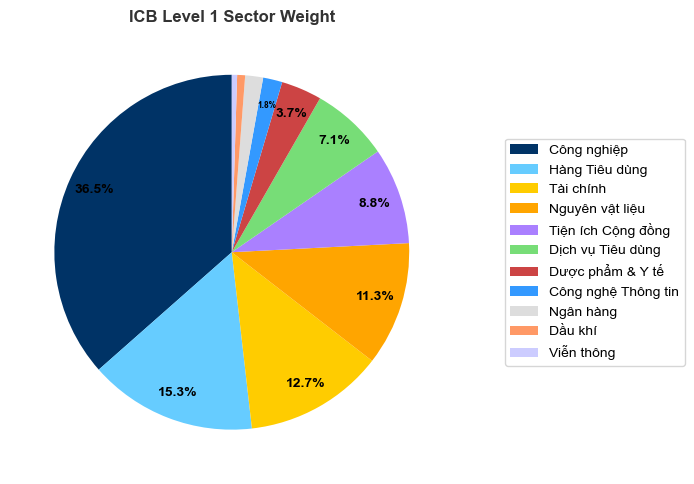

Biểu đồ đã được lưu tại images/output\ICB2.png


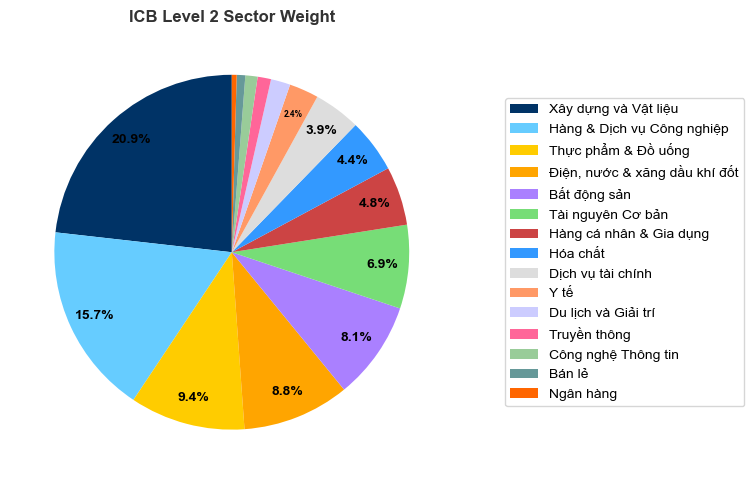

In [320]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Bảng màu tươi sáng (Ưu tiên 3 màu đã gửi, mở rộng để hài hòa)
colors1 = ["#003366", "#66CCFF", "#FFCC00", "#FFA500", "#AA80FF", "#77DD77", "#CC4444", "#3399FF", "#DDDDDD", "#FF9966", "#CCCCFF"]
colors2 = ["#003366", "#66CCFF", "#FFCC00", "#FFA500", "#AA80FF", "#77DD77", "#CC4444", "#3399FF", "#DDDDDD", "#FF9966", "#CCCCFF", "#FF6699", "#99CC99", "#669999", "#FF6600"]

# Dữ liệu cho biểu đồ 1 (Cấp 1)
labels1 = ["Công nghiệp", "Hàng Tiêu dùng", "Tài chính", "Nguyên vật liệu", 
           "Tiện ích Cộng đồng", "Dịch vụ Tiêu dùng", "Dược phẩm & Y tế", 
           "Công nghệ Thông tin", "Ngân hàng", "Dầu khí", "Viễn thông"]
sizes1 = [36.5, 15.3, 12.7, 11.3, 8.79, 7.1, 3.7, 1.75, 1.63, 0.722, 0.482]

# Dữ liệu cho biểu đồ 2 (Cấp 2)
labels2 = ["Xây dựng và Vật liệu", "Hàng & Dịch vụ Công nghiệp", "Thực phẩm & Đồ uống",
           "Điện, nước & xăng dầu khí đốt", "Bất động sản", "Tài nguyên Cơ bản",
           "Hàng cá nhân & Gia dụng", "Hóa chất", "Dịch vụ tài chính", "Y tế",
           "Du lịch và Giải trí", "Truyền thông", "Công nghệ Thông tin", "Bán lẻ", "Ngân hàng"]
sizes2 = [20.9, 15.7, 9.45, 8.79, 8.07, 6.86, 4.82, 4.39, 3.85, 2.41, 1.6, 1.1, 1.0, 0.7, 0.4]

# Thư mục lưu biểu đồ
output_dir = "images/output"
os.makedirs(output_dir, exist_ok=True)

# Hàm vẽ và lưu biểu đồ
def draw_pie_chart(labels, sizes, colors, title, filename):
    fig, ax = plt.subplots(figsize=(8, 5))
    wedges, texts, autotexts = ax.pie(sizes, labels=None, colors=colors, autopct='', startangle=90, pctdistance=0.85)

    # Hiển thị số liệu
    for i, (wedge, size) in enumerate(zip(wedges, sizes)):
        if size < 1.7:
            continue  # Bỏ qua nếu nhỏ hơn 1.7%

        angle = (wedge.theta2 + wedge.theta1) / 2
        x = 0.85 * wedge.r * np.cos(np.radians(angle))
        y = 0.85 * wedge.r * np.sin(np.radians(angle))

        font_size = 6 if size < 3 else 10
        ax.text(x, y, f"{size:.1f}%", ha='center', va='center', fontsize=font_size, color='black', fontweight="bold")

    ax.set_title(title, fontsize=12, fontweight="bold", color="#333333")
    ax.legend(labels, loc="center left", bbox_to_anchor=(1.1, 0.5), fontsize=10)
    

    # Lưu biểu đồ
    file_path = os.path.join(output_dir, filename)
    plt.tight_layout()
    plt.savefig(file_path, format="png", dpi=300)
    print(f"Biểu đồ đã được lưu tại {file_path}")
    plt.show()

# Vẽ và lưu biểu đồ cấp 1
draw_pie_chart(labels1, sizes1, colors1, "ICB Level 1 Sector Weight", "ICB1.png")

# Vẽ và lưu biểu đồ cấp 2
draw_pie_chart(labels2, sizes2, colors2, "ICB Level 2 Sector Weight", "ICB2.png")


C:\Users\DELL\AppData\Local\Temp\ipykernel_13040\2540208103.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


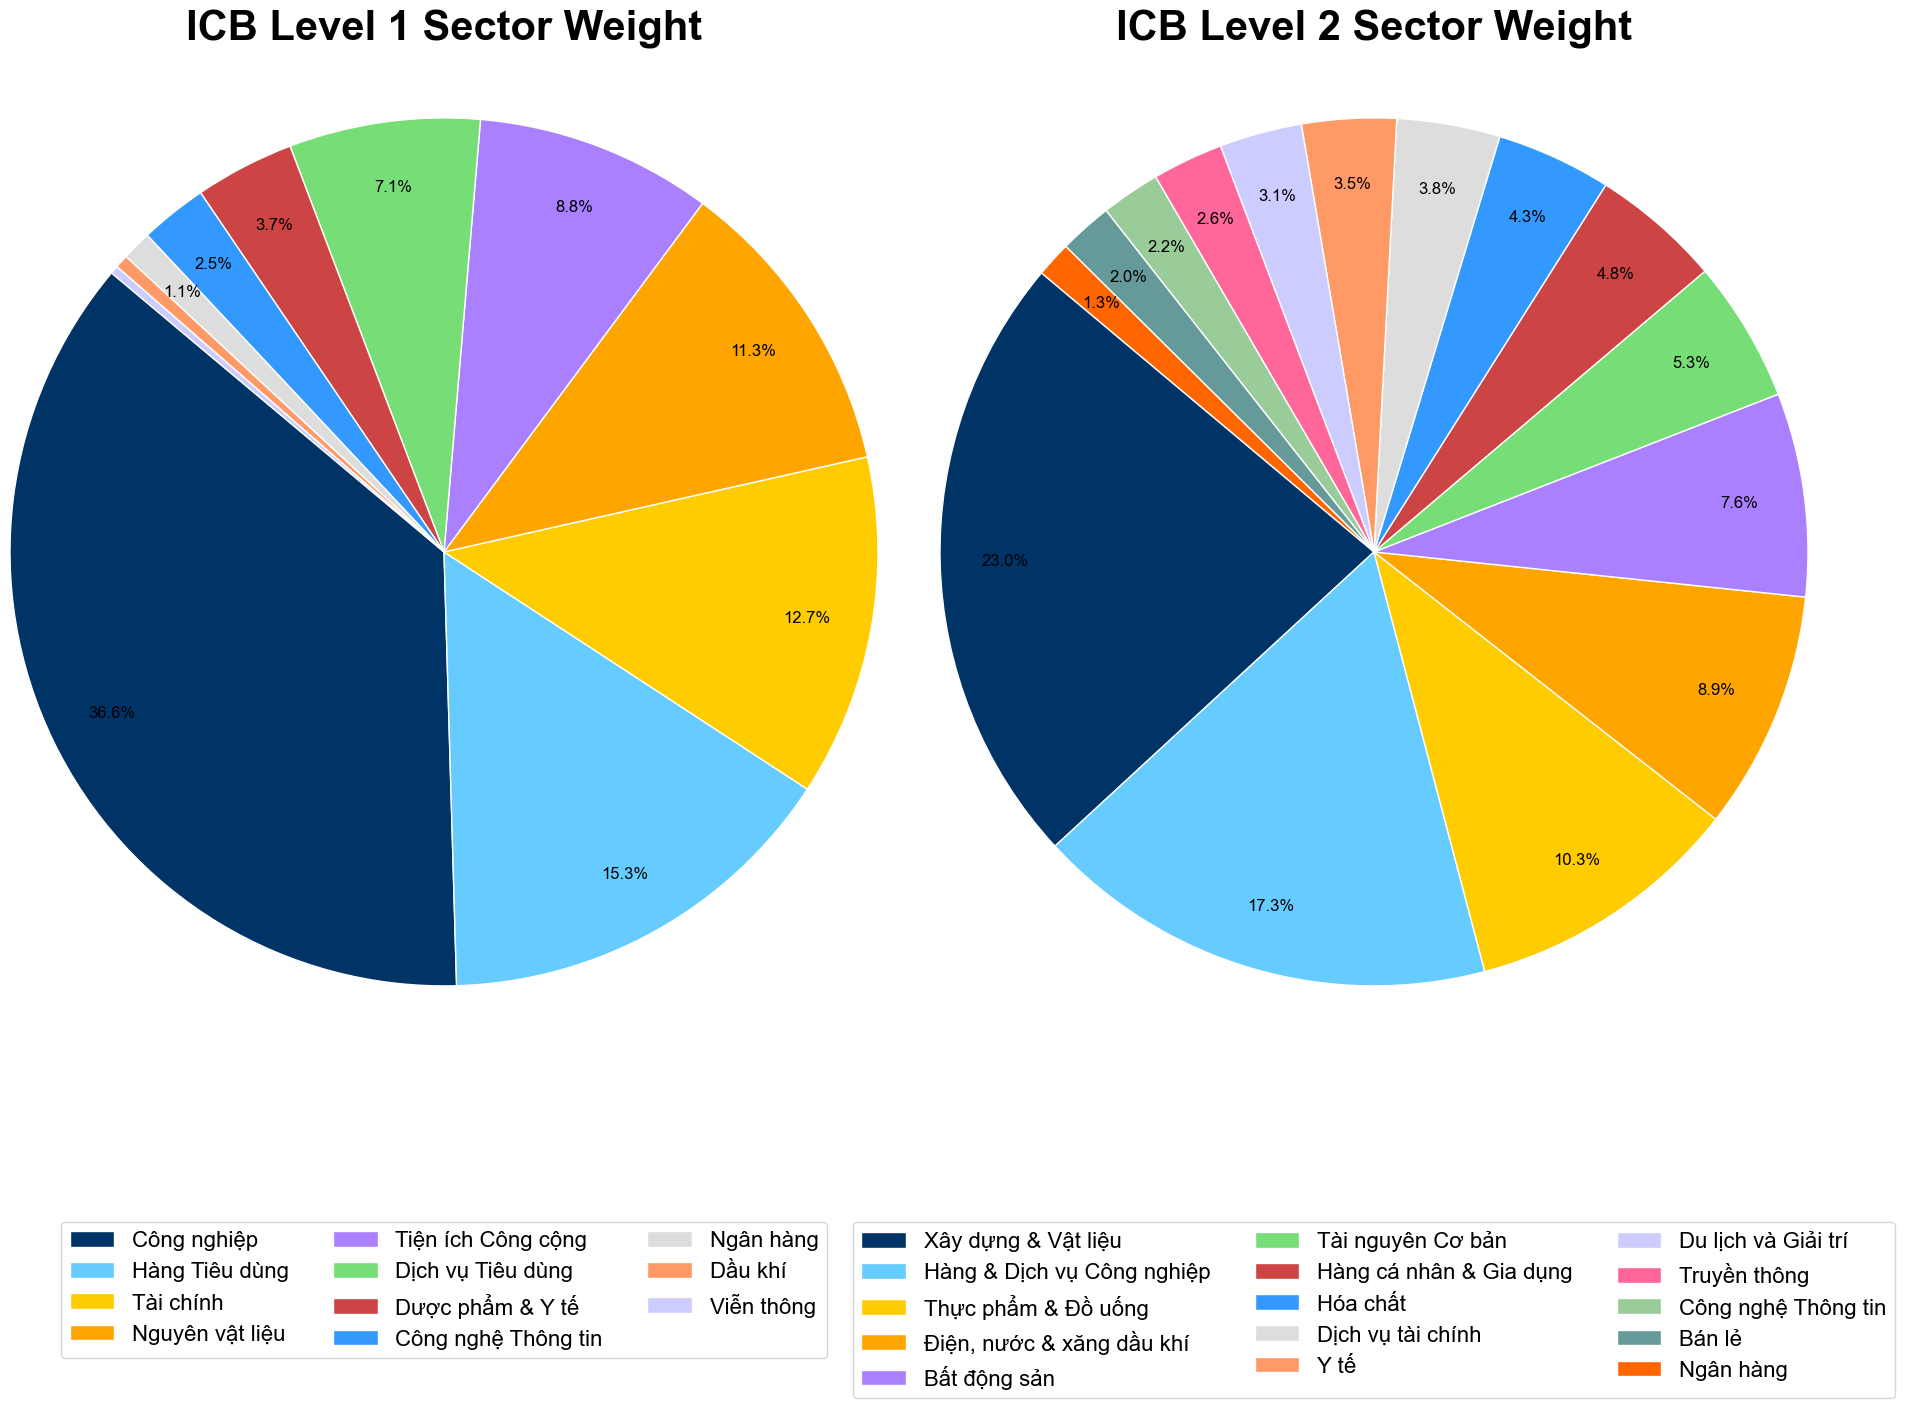

In [321]:
import matplotlib.pyplot as plt

# Dữ liệu Pie Chart 1
labels1 = ["Công nghiệp", "Hàng Tiêu dùng", "Tài chính", "Nguyên vật liệu", "Tiện ích Công cộng",
           "Dịch vụ Tiêu dùng", "Dược phẩm & Y tế", "Công nghệ Thông tin", "Ngân hàng", "Dầu khí", "Viễn thông"]
sizes1 = [36.5, 15.3, 12.7, 11.3, 8.8, 7.1, 3.7, 2.5, 1.1, 0.5, 0.3]
colors1 = ["#003366", "#66CCFF", "#FFCC00", "#FFA500", "#AA80FF", "#77DD77", "#CC4444", "#3399FF", "#DDDDDD", "#FF9966", "#CCCCFF"]

# Dữ liệu Pie Chart 2
labels2 = ["Xây dựng & Vật liệu", "Hàng & Dịch vụ Công nghiệp", "Thực phẩm & Đồ uống",
           "Điện, nước & xăng dầu khí", "Bất động sản", "Tài nguyên Cơ bản", "Hàng cá nhân & Gia dụng",
           "Hóa chất", "Dịch vụ tài chính", "Y tế", "Du lịch và Giải trí", "Truyền thông",
           "Công nghệ Thông tin", "Bán lẻ", "Ngân hàng"]
sizes2 = [20.9, 15.7, 9.4, 8.1, 6.9, 4.8, 4.4, 3.9, 3.5, 3.2, 2.8, 2.4, 2.0, 1.8, 1.2]
colors2 = ["#003366", "#66CCFF", "#FFCC00", "#FFA500", "#AA80FF", "#77DD77", "#CC4444", "#3399FF", "#DDDDDD", "#FF9966", 
           "#CCCCFF", "#FF6699", "#99CC99", "#669999", "#FF6600"]

# Hàm hiển thị % nếu >= 2
def autopct_format(pct):
    return f'{pct:.1f}%' if pct >= 1 else ''

# Tạo figure
fig, axes = plt.subplots(1, 2, figsize=(22, 12), gridspec_kw={'wspace': 0.2})

# Biểu đồ 1
wedges1, texts1, autotexts1 = axes[0].pie(
    sizes1,
    labels=None,
    autopct=lambda p: autopct_format(p),
    startangle=140,
    wedgeprops={'edgecolor': 'white'},
    pctdistance=0.85,
    colors=colors1,
    radius=1.4
)
# Tiêu đề cách xa biểu đồ
axes[0].set_title("ICB Level 1 Sector Weight", fontsize=30, fontweight="bold", y=1.15)

# Legend lớn hơn, đặt bên dưới
axes[0].legend(labels1, loc="upper center", bbox_to_anchor=(0.5, -0.35), ncol=3, fontsize=16)

# Biểu đồ 2
wedges2, texts2, autotexts2 = axes[1].pie(
    sizes2,
    labels=None,
    autopct=lambda p: autopct_format(p),
    startangle=140,
    wedgeprops={'edgecolor': 'white'},
    pctdistance=0.85,
    colors=colors2,
    radius=1.4
)
axes[1].set_title("ICB Level 2 Sector Weight", fontsize=30, fontweight="bold", y=1.15)
axes[1].legend(labels2, loc="upper center", bbox_to_anchor=(0.5, -0.35), ncol=3, fontsize=16)

plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_13040\835149184.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Biểu đồ đã được lưu tại images/output\ICB12.png


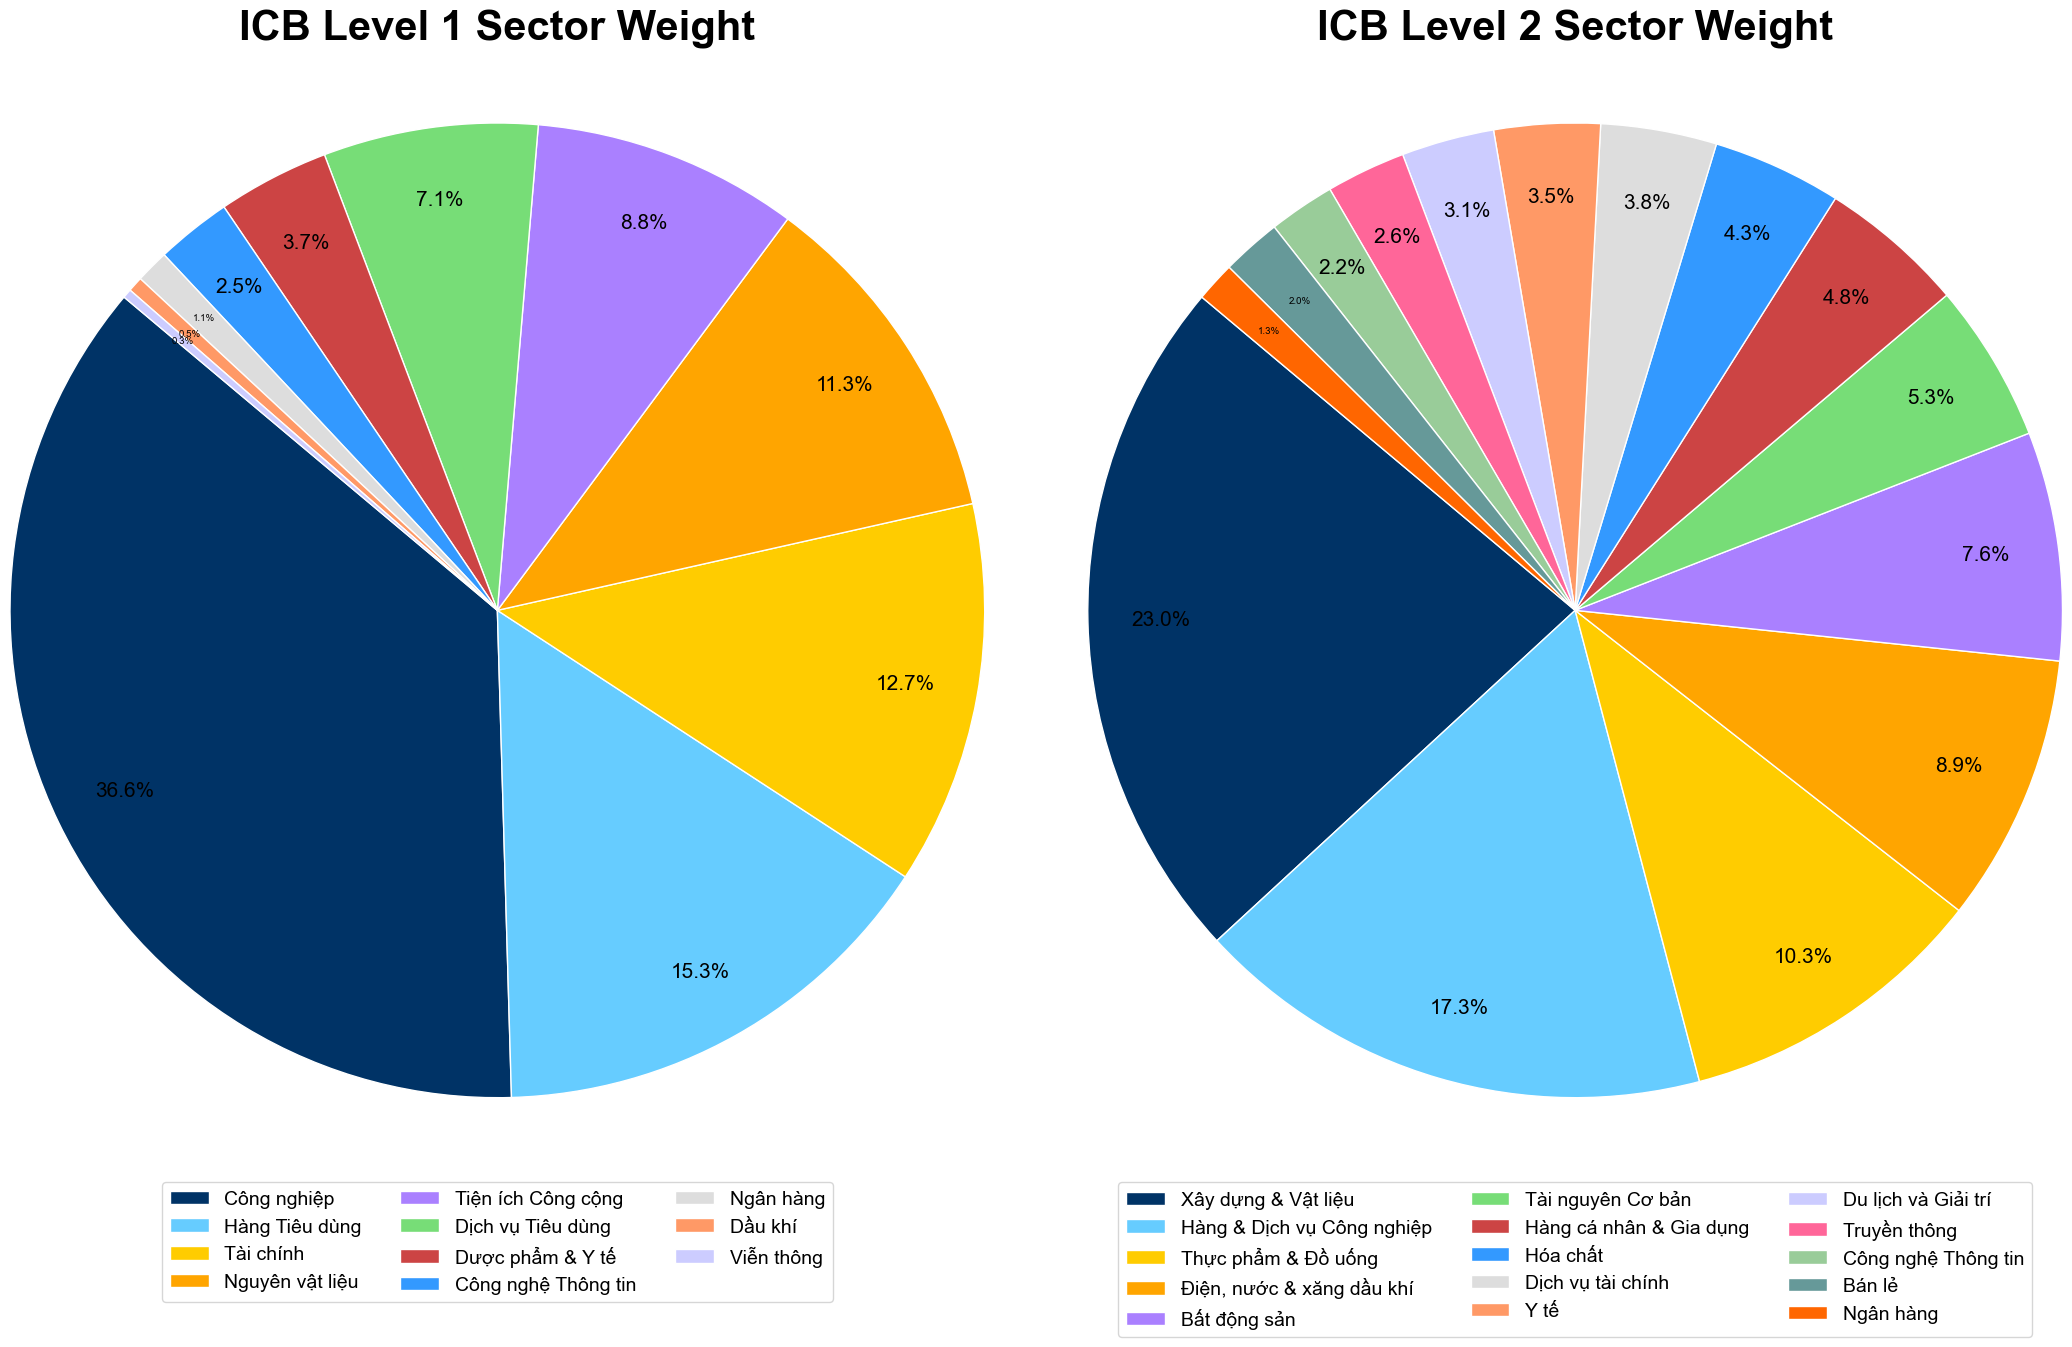

In [322]:
import matplotlib.pyplot as plt
import os

# Tạo thư mục nếu chưa có
output_dir = "images/output"
os.makedirs(output_dir, exist_ok=True)

def draw_icb12_pie_charts(labels1, sizes1, colors1, labels2, sizes2, colors2, output_dir=".", filename="ICB12.png"):
    # Hàm hiển thị % phù hợp
    def autopct_format(pct):
        if pct >= 2:
            return f'{pct:.1f}%'
        elif pct > 0:
            return f'{pct:.1f}%'
        return ''

    # Tạo figure
    fig, axes = plt.subplots(1, 2, figsize=(26, 14), gridspec_kw={'wspace': 0.15})  # Xích 2 pie lại gần

    # Biểu đồ cấp 1
    wedges1, texts1, autotexts1 = axes[0].pie(
        sizes1,
        labels=None,
        autopct=lambda p: autopct_format(p),
        startangle=140,
        wedgeprops={'edgecolor': 'white'},
        pctdistance=0.85,
        colors=colors1,
        radius=1.3
    )
    axes[0].set_title("ICB Level 1 Sector Weight", fontsize=30, fontweight="bold", y=1.1)
    for autotext, pct in zip(autotexts1, sizes1):
        fontsize = 7 if pct < 2 else 15
        autotext.set_fontsize(fontsize)
    axes[0].legend(labels1, loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=14)

    # Biểu đồ cấp 2
    wedges2, texts2, autotexts2 = axes[1].pie(
        sizes2,
        labels=None,
        autopct=lambda p: autopct_format(p),
        startangle=140,
        wedgeprops={'edgecolor': 'white'},
        pctdistance=0.85,
        colors=colors2,
        radius=1.3
    )
    axes[1].set_title("ICB Level 2 Sector Weight", fontsize=30, fontweight="bold", y=1.1)
    for autotext, pct in zip(autotexts2, sizes2):
        fontsize = 7 if pct < 2 else 15
        autotext.set_fontsize(fontsize)
    axes[1].legend(labels2, loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=14)

    # Lưu biểu đồ
    file_path = os.path.join(output_dir, filename)
    plt.tight_layout()
    plt.savefig(file_path, format="png", dpi=300, bbox_inches="tight")
    print(f"Biểu đồ đã được lưu tại {file_path}")
    plt.show()

# --- Gọi hàm ---
draw_icb12_pie_charts(labels1, sizes1, colors1, labels2, sizes2, colors2, output_dir=output_dir, filename="ICB12.png")


# ICB3 + ICB4

Biểu đồ đã được lưu tại images/output\ICB3.png


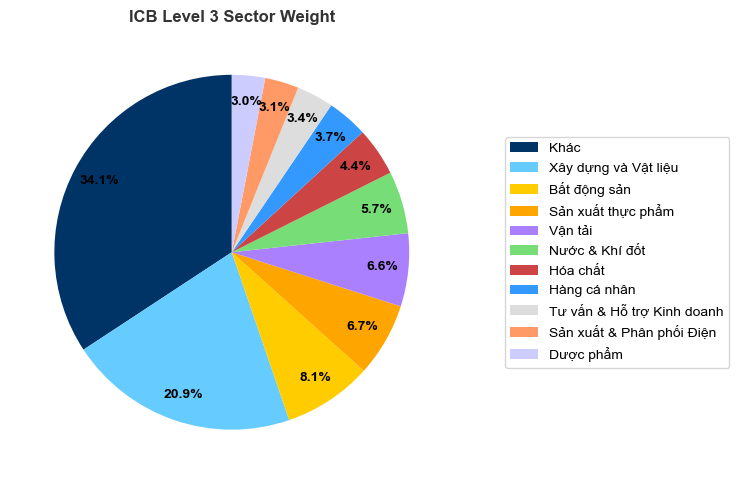

Biểu đồ đã được lưu tại images/output\ICB4.png


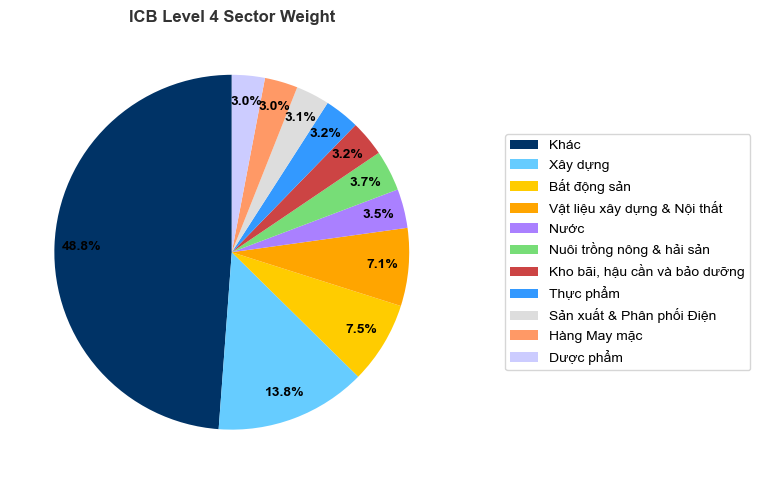

In [323]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Sử dụng cùng bảng màu với ICB1 và ICB2
colors = ["#003366", "#66CCFF", "#FFCC00", "#FFA500", "#AA80FF", "#77DD77", 
          "#CC4444", "#3399FF", "#DDDDDD", "#FF9966", "#CCCCFF", "#FF6699", 
          "#99CC99", "#669999", "#FF6600"]

# Dữ liệu cho biểu đồ 3 (Cấp 3)
labels3 = ["Khác", "Xây dựng và Vật liệu", "Bất động sản", "Sản xuất thực phẩm", "Vận tải",
           "Nước & Khí đốt", "Hóa chất", "Hàng cá nhân", "Tư vấn & Hỗ trợ Kinh doanh", 
           "Sản xuất & Phân phối Điện", "Dược phẩm"]
sizes3 = [34.1, 20.9, 8.07, 6.68, 6.62, 5.66, 4.39, 3.7, 3.35, 3.07, 3.01]

# Dữ liệu cho biểu đồ 4 (Cấp 4)
labels4 = ["Khác", "Xây dựng", "Bất động sản", "Vật liệu xây dựng & Nội thất", "Nước",
           "Nuôi trồng nông & hải sản", "Kho bãi, hậu cần và bảo dưỡng", "Thực phẩm",
           "Sản xuất & Phân phối Điện", "Hàng May mặc", "Dược phẩm"]
sizes4 = [48.8, 13.8, 7.47, 7.1, 3.55, 3.71, 3.25, 3.2, 3.07, 3.01, 3.0]

# Thư mục lưu biểu đồ
output_dir = "images/output"
os.makedirs(output_dir, exist_ok=True)

# Hàm vẽ và lưu biểu đồ
def draw_pie_chart(labels, sizes, colors, title, filename):
    fig, ax = plt.subplots(figsize=(8, 5))
    wedges, texts, autotexts = ax.pie(sizes, labels=None, colors=colors[:len(labels)], autopct='', 
                                      startangle=90, pctdistance=0.85)

    # Hiển thị số liệu (chỉ hiện nếu >= 1.7%)
    for wedge, size in zip(wedges, sizes):
        if size < 1.7:
            continue

        angle = (wedge.theta2 + wedge.theta1) / 2
        x = 0.85 * wedge.r * np.cos(np.radians(angle))
        y = 0.85 * wedge.r * np.sin(np.radians(angle))

        font_size = 6 if size < 3 else 10
        ax.text(x, y, f"{size:.1f}%", ha='center', va='center', fontsize=font_size, color='black', fontweight="bold")

    ax.set_title(title, fontsize=12, fontweight="bold", color="#333333")
    ax.legend(labels, loc="center left", bbox_to_anchor=(1.1, 0.5), fontsize=10)

    # Lưu biểu đồ
    file_path = os.path.join(output_dir, filename)
    plt.tight_layout()
    plt.savefig(file_path, format="png", dpi=300)
    print(f"Biểu đồ đã được lưu tại {file_path}")
    plt.show()

# Vẽ và lưu biểu đồ cấp 3
draw_pie_chart(labels3, sizes3, colors, "ICB Level 3 Sector Weight", "ICB3.png")

# Vẽ và lưu biểu đồ cấp 4
draw_pie_chart(labels4, sizes4, colors, "ICB Level 4 Sector Weight", "ICB4.png")


C:\Users\DELL\AppData\Local\Temp\ipykernel_13040\224728833.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Biểu đồ đã được lưu tại images/output\ICB34.png


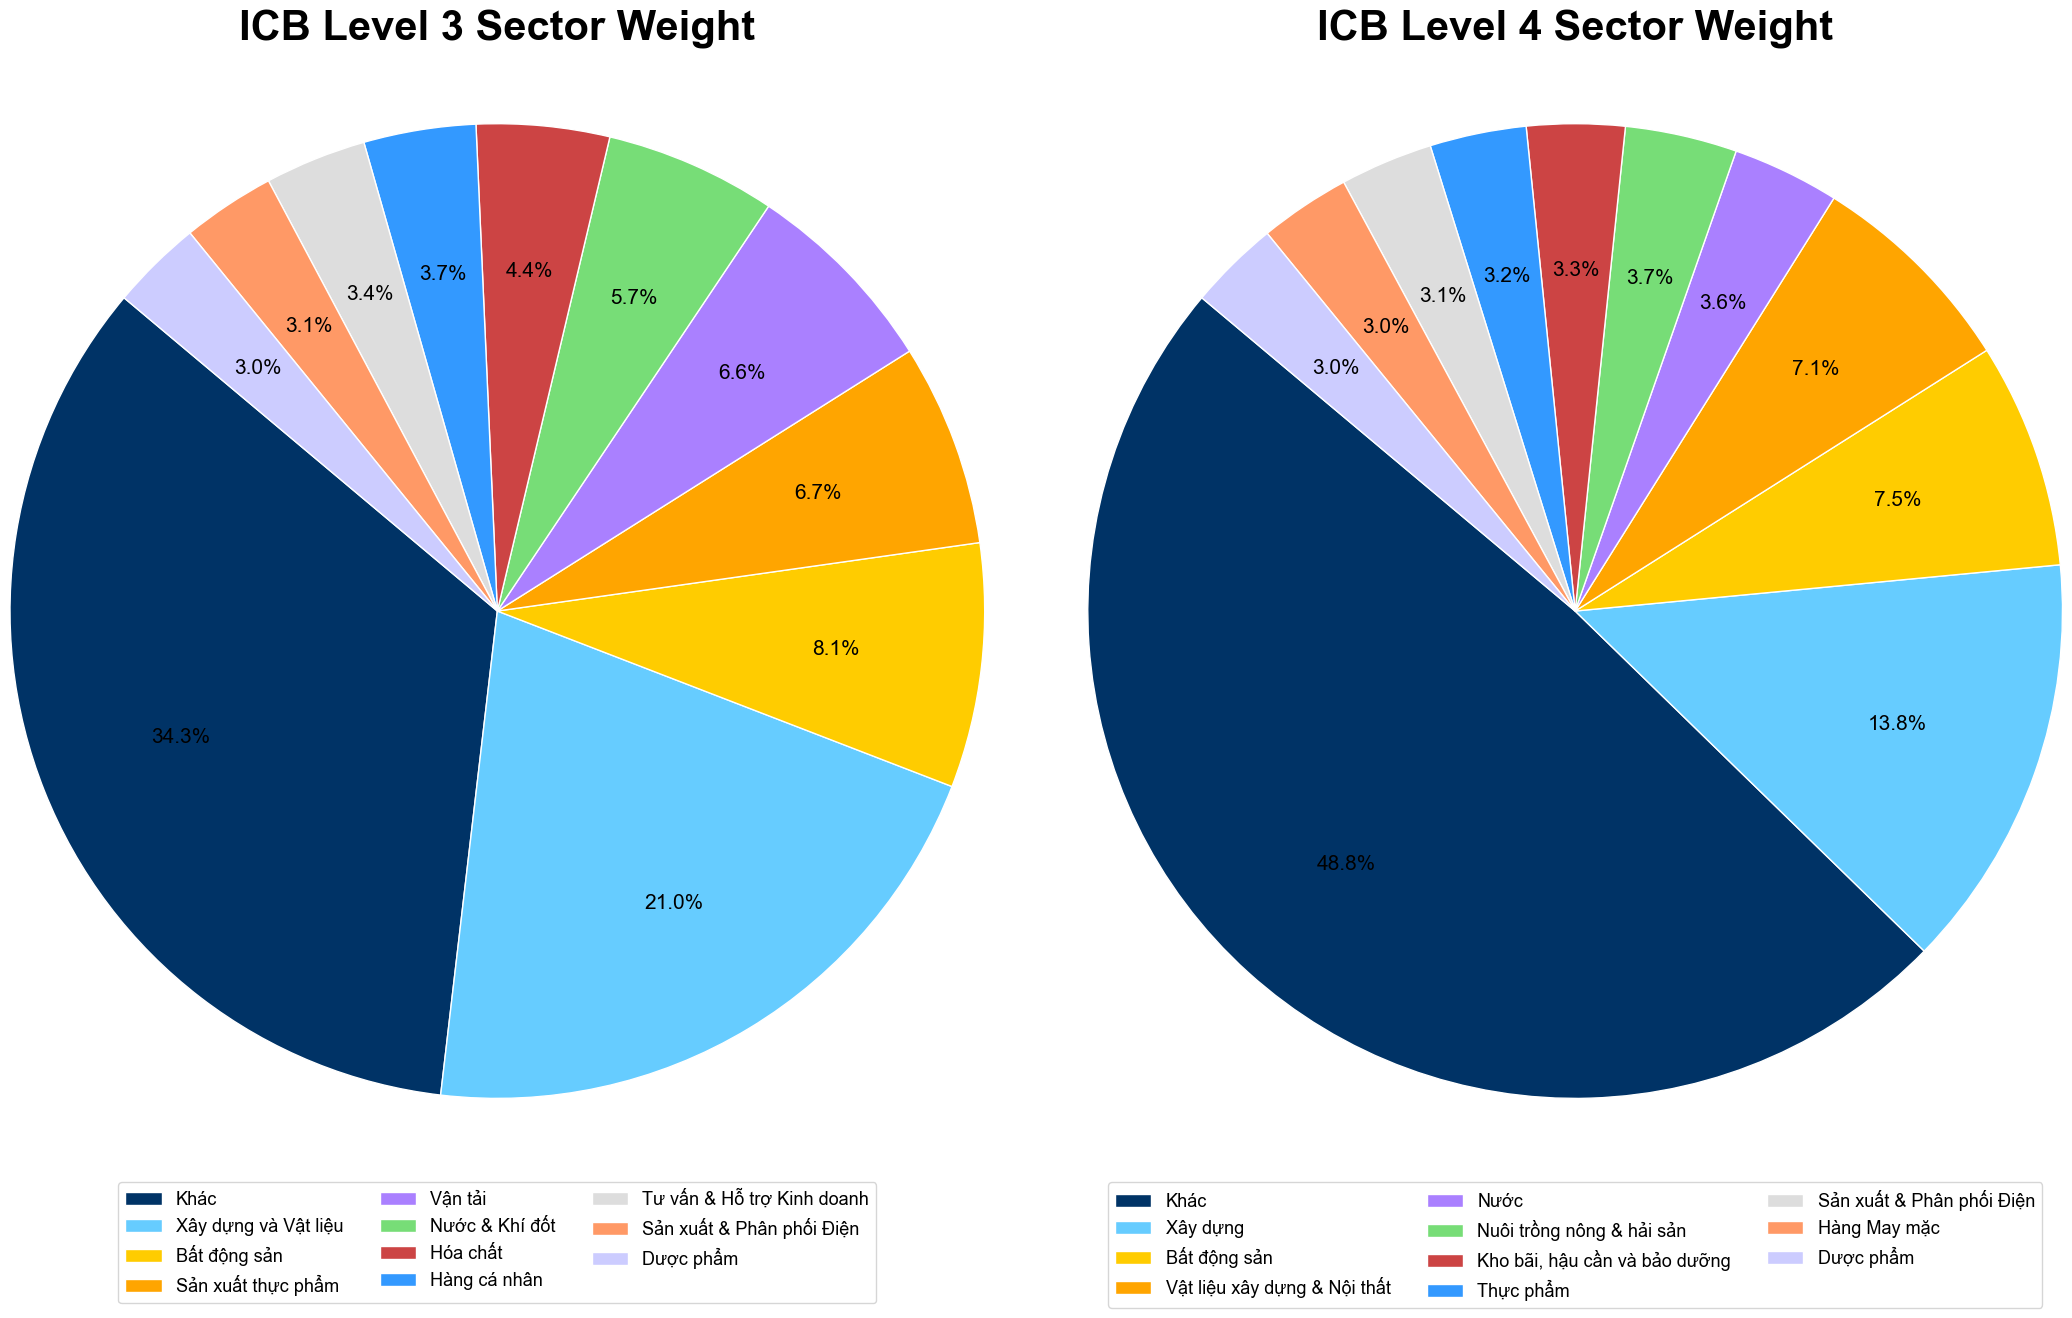

In [324]:
import matplotlib.pyplot as plt
import os

# Tạo thư mục lưu biểu đồ nếu chưa tồn tại
output_dir = "images/output"
os.makedirs(output_dir, exist_ok=True)

def draw_icb34_pie_charts(labels3, sizes3, labels4, sizes4, colors, output_dir=".", filename="ICB34.png"):
    def autopct_format(pct):
        if pct >= 2:
            return f'{pct:.1f}%'
        elif pct > 0:
            return f'{pct:.1f}%'
        return ''

    fig, axes = plt.subplots(1, 2, figsize=(26, 14), gridspec_kw={'wspace': 0.15})

    # Biểu đồ Cấp 3
    wedges3, texts3, autotexts3 = axes[0].pie(
        sizes3,
        labels=None,
        autopct=lambda p: autopct_format(p),
        startangle=140,
        wedgeprops={'edgecolor': 'white'},
        pctdistance=0.7,
        colors=colors,
        radius=1.3
    )
    axes[0].set_title("ICB Level 3 Sector Weight", fontsize=30, fontweight="bold", y=1.1)
    for autotext, pct in zip(autotexts3, sizes3):
        fontsize = 7 if pct < 2 else 15
        autotext.set_fontsize(fontsize)
    axes[0].legend(labels3, loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=13)

    # Biểu đồ Cấp 4
    wedges4, texts4, autotexts4 = axes[1].pie(
        sizes4,
        labels=None,
        autopct=lambda p: autopct_format(p),
        startangle=140,
        wedgeprops={'edgecolor': 'white'},
        pctdistance=0.7,
        colors=colors,
        radius=1.3
    )
    axes[1].set_title("ICB Level 4 Sector Weight", fontsize=30, fontweight="bold", y=1.1)
    for autotext, pct in zip(autotexts4, sizes4):
        fontsize = 7 if pct < 2 else 15
        autotext.set_fontsize(fontsize)
    axes[1].legend(labels4, loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=13)

    # Lưu biểu đồ
    file_path = os.path.join(output_dir, filename)
    plt.tight_layout()
    plt.savefig(file_path, format="png", dpi=300, bbox_inches="tight")
    print(f"Biểu đồ đã được lưu tại {file_path}")
    plt.show()

# --- Dữ liệu ---
colors = ["#003366", "#66CCFF", "#FFCC00", "#FFA500", "#AA80FF", "#77DD77", 
          "#CC4444", "#3399FF", "#DDDDDD", "#FF9966", "#CCCCFF", "#FF6699", 
          "#99CC99", "#669999", "#FF6600"]

labels3 = ["Khác", "Xây dựng và Vật liệu", "Bất động sản", "Sản xuất thực phẩm", "Vận tải",
           "Nước & Khí đốt", "Hóa chất", "Hàng cá nhân", "Tư vấn & Hỗ trợ Kinh doanh", 
           "Sản xuất & Phân phối Điện", "Dược phẩm"]
sizes3 = [34.1, 20.9, 8.07, 6.68, 6.62, 5.66, 4.39, 3.7, 3.35, 3.07, 3.01]

labels4 = ["Khác", "Xây dựng", "Bất động sản", "Vật liệu xây dựng & Nội thất", "Nước",
           "Nuôi trồng nông & hải sản", "Kho bãi, hậu cần và bảo dưỡng", "Thực phẩm",
           "Sản xuất & Phân phối Điện", "Hàng May mặc", "Dược phẩm"]
sizes4 = [48.8, 13.8, 7.47, 7.1, 3.55, 3.71, 3.25, 3.2, 3.07, 3.01, 3.0]

# --- Gọi hàm ---
draw_icb34_pie_charts(labels3, sizes3, labels4, sizes4, colors, output_dir=output_dir, filename="ICB34.png")


# REVENUE, TOTAL ASSETS, EQUITY 

Biểu đồ đã được lưu tại images/output\chart1.png


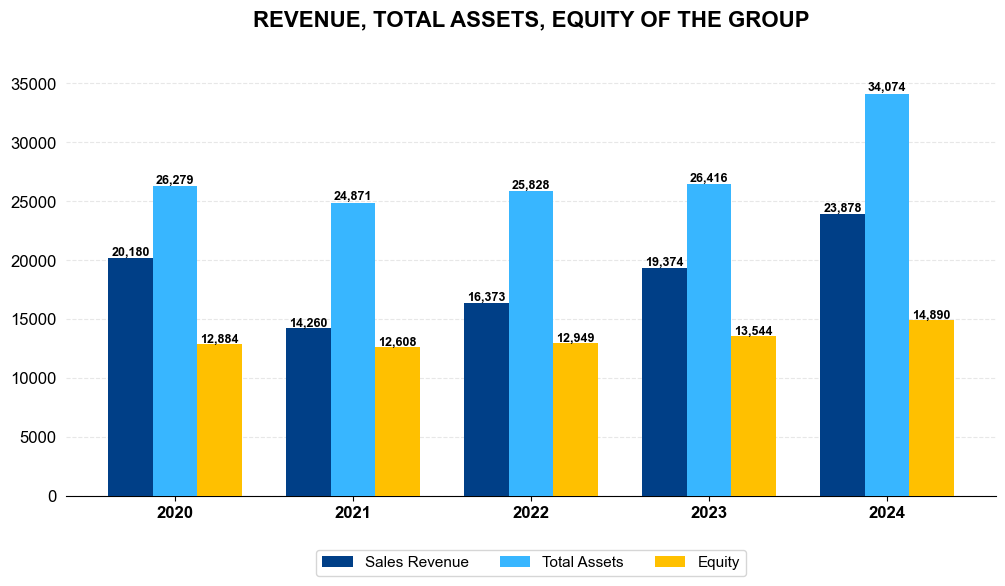

In [325]:
def get_values(label, transposed_df):
    """Hàm lấy giá trị từ transposed_df, luôn trả về mảng numpy hợp lệ."""
    row = transposed_df[transposed_df["Chỉ tiêu"] == label]
    return np.round(row.iloc[:, 1:].fillna(0).values.flatten().astype(float)) if not row.empty else np.zeros(len(transposed_df.columns[1:]), dtype=float)

# Dữ liệu từ DataFrame
years = transposed_df.columns[1:]

# Lấy dữ liệu từng chỉ tiêu
sales_revenue = get_values("KQKD. DOANH THU THUẦN", transposed_df).astype(int)
total_assets = get_values("CĐKT. TỔNG CỘNG TÀI SẢN", transposed_df).astype(int)
equity = get_values("CĐKT. VỐN CHỦ SỞ HỮU", transposed_df).astype(int)

# Thiết lập màu sắc
colors = {"sales_revenue": "#003f87", "total_assets": "#38b6ff", "equity": "#ffc000"}

# Kích thước cột và vị trí
bar_width = 0.25
x = np.arange(len(years))

# Tạo biểu đồ
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, sales_revenue, width=bar_width, color=colors["sales_revenue"], label="Sales Revenue", zorder=3)
plt.bar(x, total_assets, width=bar_width, color=colors["total_assets"], label="Total Assets", zorder=3)
plt.bar(x + bar_width, equity, width=bar_width, color=colors["equity"], label="Equity", zorder=3)

# Điều chỉnh giới hạn trục y
plt.ylim(0, max(sales_revenue.max(), total_assets.max(), equity.max()) * 1.15)

# Thêm số liệu trên cột
for i in range(len(years)):
    for shift, values in zip([-bar_width, 0, bar_width], [sales_revenue, total_assets, equity]):
        plt.text(x[i] + shift, values[i] * 1.01, f"{values[i]:,}", ha="center", fontsize=9, color="black", fontweight="bold")

# Thiết lập nhãn và tiêu đề
plt.title("REVENUE, TOTAL ASSETS, EQUITY OF THE GROUP", fontsize=16, weight="bold", fontname="Arial")
plt.xticks(x, years, fontweight="bold", fontsize=12, fontname="Arial")

# Xóa viền không cần thiết
for spine in ["top", "right", "left"]:
    plt.gca().spines[spine].set_visible(False)
plt.tick_params(axis="y", labelsize=12, left=False)

# Đưa chú thích xuống dưới
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, prop={"size": 11, "family": "Arial"})
plt.grid(axis="y", linestyle="--", alpha=0.3, zorder=0)

# Lưu biểu đồ
output_dir = "images/output"
os.makedirs(output_dir, exist_ok=True)
file_name = os.path.join(output_dir, "chart1.png")
plt.savefig(file_name, format="png", dpi=300)
print(f"Biểu đồ đã được lưu tại {file_name}")

# Hiển thị biểu đồ
plt.show()


Biểu đồ đã được lưu thành công tại images/output/chart2.png


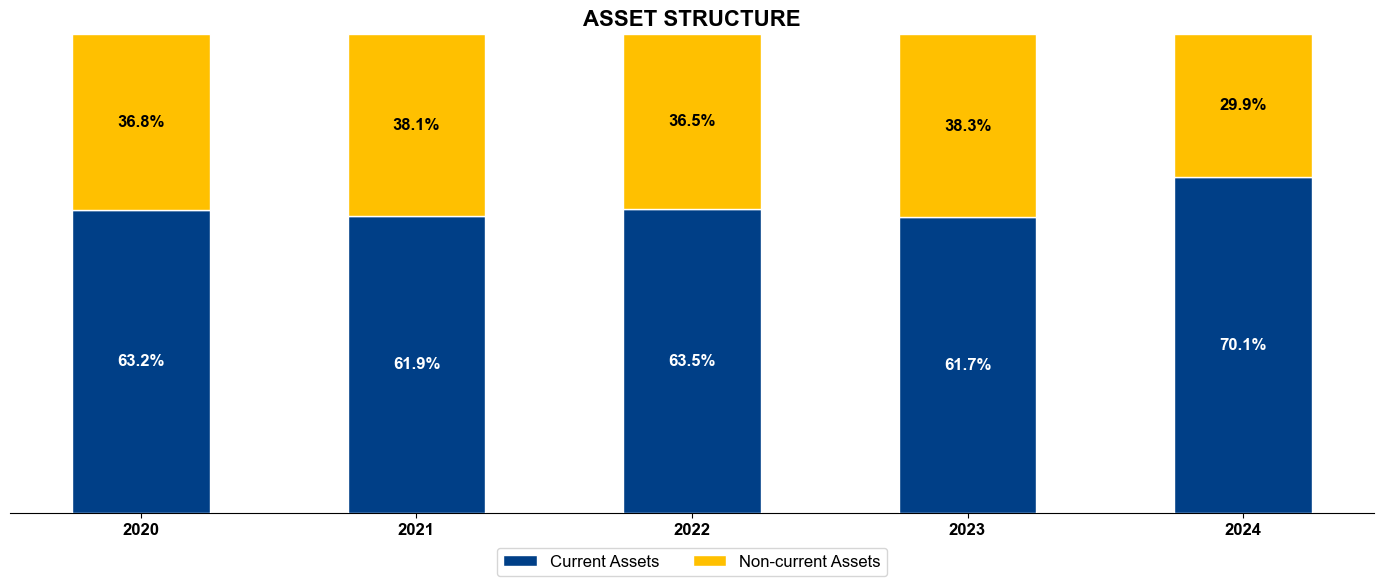

In [326]:
# Cài đặt phông chữ mặc định
plt.rcParams.update({
    "font.family": "Arial",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12
})

# Hàm lấy giá trị từ DataFrame
def get_values(df, label):
    row = df[df["Chỉ tiêu"] == label]
    return np.array(row.iloc[:, 1:].fillna(0).values.flatten(), dtype=float) if not row.empty else np.zeros(len(df.columns[1:]))

# Dữ liệu
years = transposed_df.columns[1:]
ts_ngan_han = get_values(transposed_df, "CĐKT. TÀI SẢN NGẮN HẠN")
ts_dai_han = get_values(transposed_df, "CĐKT. TÀI SẢN DÀI HẠN")
total_assets = ts_ngan_han + ts_dai_han
current_assets = np.round((ts_ngan_han / total_assets) * 100, 1)
non_current_assets = np.round((ts_dai_han / total_assets) * 100, 1)

# Thiết lập màu sắc và vẽ biểu đồ
colors = {"current_assets": "#003f87", "non_current_assets": "#ffc000"}
r = np.arange(len(years))
bar_width = 0.5
plt.figure(figsize=(14, 6))
plt.bar(r, current_assets, color=colors["current_assets"], edgecolor='white', width=bar_width, label="Current Assets", zorder=3)
plt.bar(r, non_current_assets, bottom=current_assets, color=colors["non_current_assets"], edgecolor='white', width=bar_width, label="Non-current Assets", zorder=3)

# Thêm nhãn phần trăm
for i, (cur, non_cur) in enumerate(zip(current_assets, non_current_assets)):
    plt.text(r[i], cur / 2, f"{cur}%", ha='center', va='center', color='white', fontsize=12, fontweight="bold", zorder=4)
    plt.text(r[i], cur + non_cur / 2, f"{non_cur}%", ha='center', va='center', color='black', fontsize=12, fontweight="bold", zorder=4)

# Cấu hình trục và chú thích
plt.title("ASSET STRUCTURE", fontsize=16, weight="bold")
plt.ylabel("")
plt.xticks(r, years, fontweight="bold")
plt.ylim(0, 100)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().set_yticks([])
plt.gca().tick_params(axis='y', which='both', left=False)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Lưu và hiển thị biểu đồ
file_name = "images/output/chart2.png"
plt.tight_layout()
plt.savefig(file_name, format="png", dpi=300)
print(f"Biểu đồ đã được lưu thành công tại {file_name}")
plt.show()


Biểu đồ đã được lưu thành công tại images/output/chart3.png


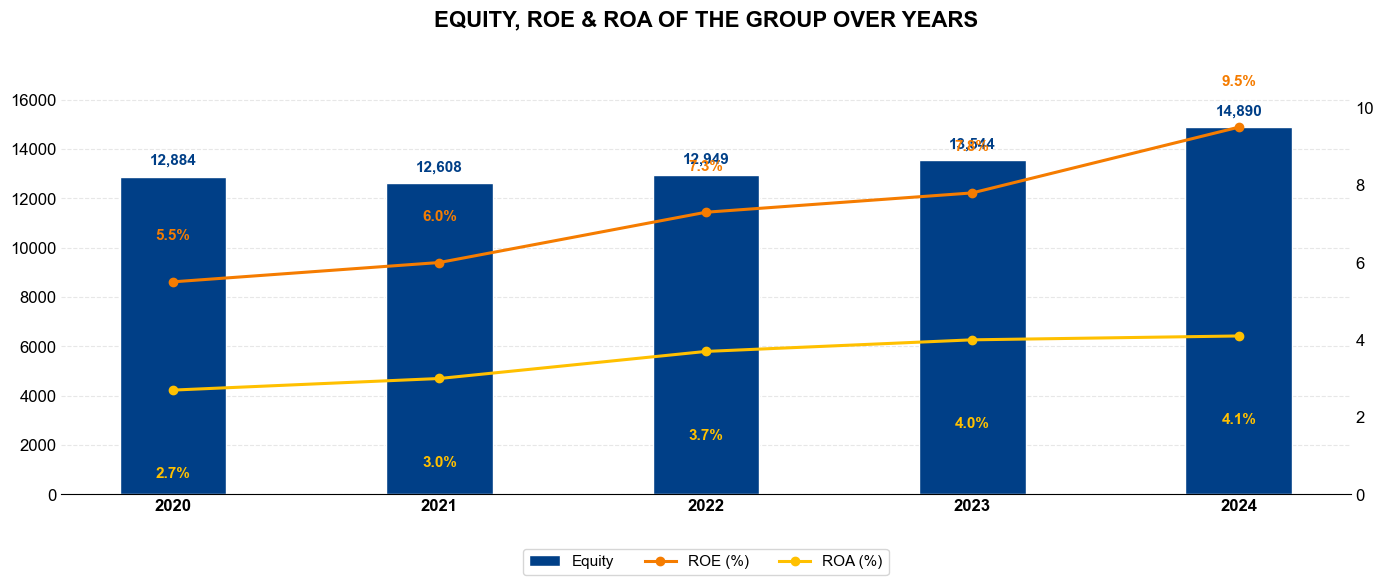

In [327]:
# Cài đặt phông chữ mặc định
plt.rcParams.update({
    "font.family": "Arial",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12
})

# Hàm lấy giá trị từ transposed_df
def get_values(label):
    row = transposed_df[transposed_df["Chỉ tiêu"] == label]
    if row.empty:
        return np.zeros(len(transposed_df.columns[1:]), dtype=float)
    values = row.iloc[:, 1:].fillna(0).values.flatten()
    return np.array(values, dtype=float)

# Lấy danh sách các năm
years = transposed_df.columns[1:]

# Nhãn của các chỉ tiêu cần lấy
net_income_label = "KQKD. LỢI NHUẬN SAU THUẾ THU NHẬP DOANH NGHIỆP"
total_equity_label = "CĐKT. VỐN CHỦ SỞ HỮU"
total_assets_label = "CĐKT. TỔNG CỘNG TÀI SẢN"

# Lấy dữ liệu từng chỉ tiêu
net_income = get_values(net_income_label)
equity = get_values(total_equity_label)
total_assets = get_values(total_assets_label)

# Tính ROE và ROA (tránh chia cho 0)
roe = np.divide(net_income, equity, out=np.zeros_like(net_income), where=equity != 0) * 100
roe = np.round(roe, 1)

roa = np.divide(net_income, total_assets, out=np.zeros_like(net_income), where=total_assets != 0) * 100
roa = np.round(roa, 1)

# Tự động điều chỉnh trục y
y_max_roe_roa = max(max(roe, default=0), max(roa, default=0)) * 1.2
y_max_equity = max(equity, default=0) * 1.2

# Thiết lập màu sắc
colors = {
    "equity": "#003f87",
    "roe": "#f57c00",
    "roa": "#ffc000"
}

fig, ax1 = plt.subplots(figsize=(14, 6))

# Tạo các cột cho equity
bar_width = 0.4
ax1.bar(years, equity, color=colors["equity"], edgecolor='white', width=bar_width, label="Equity", zorder=3)

# Thêm số liệu vào các cột
for i in range(len(years)):
    ax1.text(i, equity[i] + y_max_equity * 0.02, f'{equity[i]:,.0f}', ha='center', va='bottom', color=colors["equity"], fontsize=11, fontweight='bold')

# ✅ Xóa tất cả tick marks trên trục y và x nhưng vẫn giữ số
ax1.set_ylim(0, y_max_equity)
ax1.tick_params(axis='both', which='both', length=0)  # Xóa hoàn toàn ticks mark trên cả trục x và y
ax1.yaxis.grid(True, linestyle="--", alpha=0.3, zorder=1)  # Lưới ngang mờ nhẹ
for spine in ['top', 'left', 'right', 'bottom']:
    ax1.spines[spine].set_visible(False)  # Xóa viền

# Tạo trục y thứ hai cho ROE và ROA
ax2 = ax1.twinx()
ax2.set_ylim(0, y_max_roe_roa)
ax2.tick_params(axis='both', which='both', length=0)  # ✅ Xóa tick marks bên phải và giữ số
for spine in ['top', 'left', 'right']:
    ax2.spines[spine].set_visible(False)  # Xóa viền

# Vẽ đường ROE và ROA
ax2.plot(years, roe, color=colors["roe"], marker='o', label="ROE (%)", linewidth=2.2, zorder=4)
ax2.plot(years, roa, color=colors["roa"], marker='o', label="ROA (%)", linewidth=2.2, zorder=4)

# Thêm số liệu vào các điểm ROE & ROA
for i in range(len(years)):
    ax2.text(i, roe[i] + 1, f'{roe[i]:.1f}%', ha='center', va='bottom', color=colors["roe"], fontsize=11, fontweight='bold')
    ax2.text(i, roa[i] - 2, f'{roa[i]:.1f}%', ha='center', va='top', color=colors["roa"], fontsize=11, fontweight='bold')

# Tiêu đề và nhãn trục X
plt.title("EQUITY, ROE & ROA OF THE GROUP OVER YEARS", fontsize=16, weight="bold", fontname="Arial", pad=20)  # Điều chỉnh khoảng cách giữa tiêu đề và biểu đồ
ax1.set_xticks(np.arange(len(years)))
ax1.set_xticklabels([f'{year}' for year in years], fontweight='bold', fontsize=12)
ax1.xaxis.labelpad = 15  # Điều chỉnh khoảng cách giữa nhãn trục X và trục X

# Kết hợp chú thích
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3, fontsize=11)

# Lưu lại biểu đồ dưới dạng ảnh PNG
file_name = "images/output/chart3.png"
plt.tight_layout()
plt.savefig(file_name, format="png", dpi=300)
print(f"Biểu đồ đã được lưu thành công tại {file_name}")

plt.tight_layout()
plt.show()

Biểu đồ đã được lưu thành công tại images/output/chart4.png


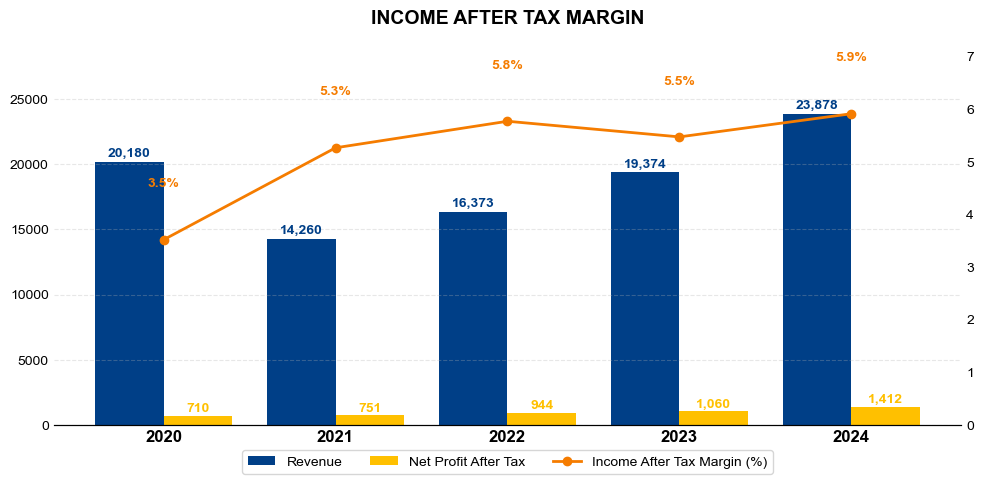

In [328]:
# Hàm lấy giá trị từ transposed_df
def get_values(label, df):
    row = df[df["Chỉ tiêu"] == label]
    return row.iloc[:, 1:].values.flatten() if not row.empty else np.zeros(len(df.columns[1:]))

# Nhãn của các chỉ tiêu
labels = {
    "net_income": "KQKD. LỢI NHUẬN SAU THUẾ THU NHẬP DOANH NGHIỆP",
    "revenue": "KQKD. DOANH THU THUẦN"
}

# Lấy dữ liệu từng chỉ tiêu
net_income = get_values(labels["net_income"], transposed_df)
revenue = get_values(labels["revenue"], transposed_df)

# Tính Income After Tax Margin (%)
income_after_tax_margin = np.divide(net_income, revenue, out=np.zeros_like(net_income), where=revenue != 0) * 100

# Lấy danh sách các năm từ 2020-2024
years = transposed_df.columns[1:]
selected_years = ["2020", "2021", "2022", "2023", "2024"]
mask = np.isin(years, selected_years)

# Lọc theo các năm đã chọn
years = years[mask]
net_income = net_income[mask]
revenue = revenue[mask]
income_after_tax_margin = income_after_tax_margin[mask]

# Màu sắc
colors = {
    "revenue": "#003f87",  # Xanh dương
    "net_income": "#ffc000",  # Vàng
    "margin": "#f57c00"  # Cam
}

# Tạo biểu đồ
fig, ax1 = plt.subplots(figsize=(10, 5))

# Tạo cột doanh thu và lợi nhuận
bar_width = 0.4
x = np.arange(len(years))

bars1 = ax1.bar(x - bar_width/2, revenue, color=colors["revenue"], width=bar_width, label="Revenue", zorder=1)
bars2 = ax1.bar(x + bar_width/2, net_income, color=colors["net_income"], width=bar_width, label="Net Profit After Tax", zorder=1)

# Thêm số liệu lên cột
for i in range(len(years)):
    ax1.text(x[i] - bar_width/2, revenue[i] + 400 , f'{revenue[i]:,.0f}', ha='center', color=colors["revenue"], fontweight='bold', fontsize=10)
    ax1.text(x[i] + bar_width/2, net_income[i] + 300, f'{net_income[i]:,.0f}', ha='center', color=colors["net_income"], fontweight='bold', fontsize=10)

# Trục y cho doanh thu và lợi nhuận
ax1.set_ylim(0, max(revenue) * 1.2)

# Trục y thứ 2 cho Income After Tax Margin (%)
ax2 = ax1.twinx()
ax2.set_ylim(0, max(income_after_tax_margin) * 1.2)

# Vẽ đường Income After Tax Margin (%)
line1 = ax2.plot(x, income_after_tax_margin, color=colors["margin"], marker='o', markersize=6,linewidth=2, label="Income After Tax Margin (%)", zorder=4)

# Thêm số liệu trên đường (trả về màu cam như cũ)
for i in range(len(years)):
    ax2.text(x[i], income_after_tax_margin[i] + 1, f'{income_after_tax_margin[i]:.1f}%', ha='center', color=colors["margin"], fontweight='bold', fontsize=10)

# Tiêu đề và nhãn trục X
plt.title("INCOME AFTER TAX MARGIN", fontsize=14, weight="bold",fontname = "Arial", pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels(years, fontweight='bold', fontsize=12)

# Giữ lại số trên trục tung
ax1.tick_params(axis='y', labelsize=10)
ax2.tick_params(axis='y', labelsize=10)

# Xóa tất cả ticks mark
ax1.tick_params(axis='both', length=0)
ax2.tick_params(axis='both', length=0)

# Xóa viền trái, phải, trên
for spine in ["top", "left", "right"]:
    ax1.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)

# Chú thích xuống đáy
bars_labels = [bars1, bars2, line1[0]]
labels = [b.get_label() for b in bars_labels]
ax1.legend(bars_labels, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10)

# Đường lưới ngang nhẹ
ax1.grid(axis='y', linestyle='--', alpha=0.3, zorder=1)

# Lưu lại biểu đồ dưới dạng ảnh PNG
file_name = "images/output/chart4.png"  # Đặt tên cho file ảnh
plt.tight_layout()
plt.savefig(file_name, format="png", dpi=300)  # Lưu ảnh dưới định dạng PNG
print(f"Biểu đồ đã được lưu thành công tại {file_name}")

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Biểu đồ đã được lưu thành công tại images/output\chart7.png


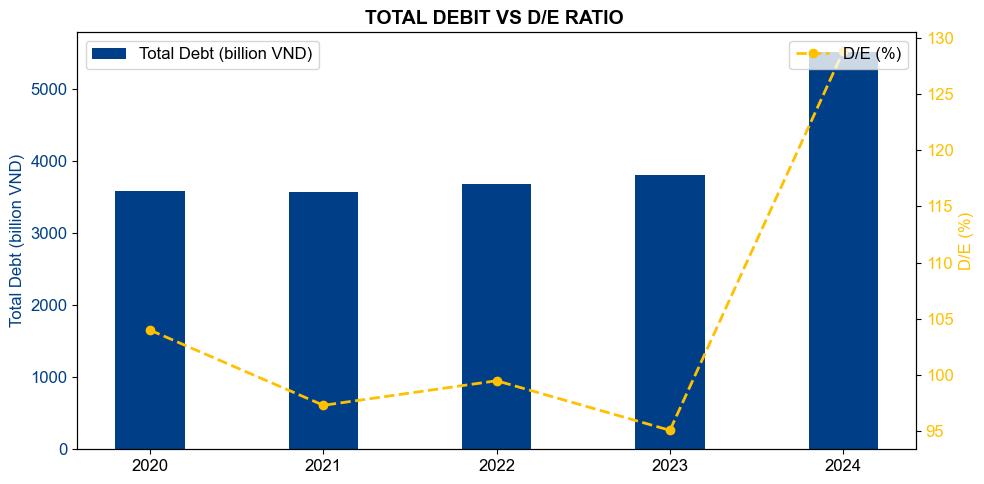

In [329]:
import matplotlib.pyplot as plt
import os

# Dữ liệu từ 2020-2024
years = ["2020", "2021", "2022", "2023", "2024"]
total_long_term_debt = [3592.29, 3570.98, 3680.29, 3811.80, 5517.2]  # Tổng nợ dài hạn (billion VND)
de_ratio = [103.97, 97.27, 99.46, 95.04, 128.83]  # Hệ số D/E (%)

# Thiết lập màu sắc
colors = {"Total Debt": "#003f87", "D/E": "#ffc000"}

# Khởi tạo biểu đồ
fig, ax1 = plt.subplots(figsize=(10, 5))

# Cột thon hơn với width = 0.4
bar_width = 0.4
ax1.bar(years, total_long_term_debt, color=colors["Total Debt"], width=bar_width, label="Total Debt (billion VND)")

# Trục Y chính (bên trái)
ax1.set_ylabel("Total Debt (billion VND)", fontsize=12, color=colors["Total Debt"])
ax1.tick_params(axis='y', labelcolor=colors["Total Debt"])

# Trục Y phụ (bên phải)
ax2 = ax1.twinx()
ax2.plot(years, de_ratio, marker="o", linestyle="dashed", color=colors["D/E"], label="D/E (%)", linewidth=2)

ax2.set_ylabel("D/E (%)", fontsize=12, color=colors["D/E"])
ax2.tick_params(axis='y', labelcolor=colors["D/E"])

# Tiêu đề biểu đồ
plt.title("TOTAL DEBIT VS D/E RATIO ", fontsize=14, fontweight="bold")

# Hiển thị chú thích
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Lưu lại biểu đồ dưới dạng ảnh PNG
output_dir = "images/output"
os.makedirs(output_dir, exist_ok=True)
file_name = os.path.join(output_dir, "chart7.png")  # Đặt tên file là chart7.png
plt.tight_layout()
plt.savefig(file_name, format="png", dpi=300)
print(f"Biểu đồ đã được lưu thành công tại {file_name}")

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


Biểu đồ đã được lưu tại images/output\chart5.png


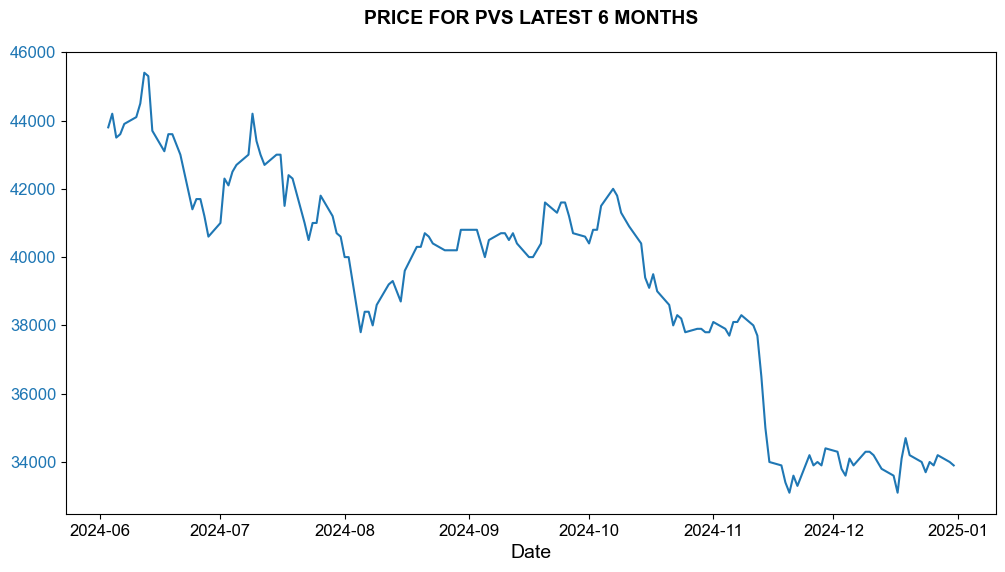

In [330]:
# Lọc dữ liệu theo khoảng thời gian từ 1/1/2024 đến 31/12/2024
dates = pd.to_datetime(price.columns[1:])  # Đảm bảo date là từ cột thứ 2 trở đi
start_date = pd.to_datetime('06/01/2024')
end_date = pd.to_datetime('12/31/2024')

# Tạo một mask với chiều dài đúng
date_mask = (dates >= start_date) & (dates <= end_date)

# Lọc dữ liệu của 'PVS' trong price và volume
filtered_price_data = price.loc[price['Code'] == 'PVS', price.columns[1:]].iloc[0]
filtered_volume_data = volume.loc[volume['Code'] == 'PVS', volume.columns[1:]].iloc[0]

# Áp dụng date_mask để chọn các cột ngày từ price và volume
filtered_price_data = filtered_price_data[date_mask]
filtered_volume_data = filtered_volume_data[date_mask]

# Loại bỏ những ngày không có dữ liệu (nghĩa là không có cột ngày trong cả price và volume)
valid_dates_mask = filtered_price_data.notna() & filtered_volume_data.notna()

# Chỉ lấy các ngày có dữ liệu
filtered_price_data = filtered_price_data[valid_dates_mask]
dates = dates[date_mask][valid_dates_mask]  # Cập nhật lại biến dates


# # Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(12, 6))

# # Vẽ biểu đồ line cho price
ax1.plot(dates, filtered_price_data, color='tab:blue', label='Price')
ax1.set_xlabel('Date')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Tiêu đề giống mẫu
plt.title("PRICE FOR PVS LATEST 6 MONTHS", fontsize=14, weight="bold", fontname="Arial", pad=20)

# # Lưu biểu đồ
output_dir = "images/output"
os.makedirs(output_dir, exist_ok=True)
file_name = os.path.join(output_dir, "chart5.png")
plt.savefig(file_name, format="png", dpi=300)
print(f"Biểu đồ đã được lưu tại {file_name}")



In [331]:

# Giả sử dữ liệu price có cấu trúc như sau:
# price = pd.read_csv("file_price.csv")

# Chuyển đổi cột ngày thành kiểu datetime
dates = pd.to_datetime(price.columns[1:])  # Giả sử giá đóng cửa bắt đầu từ cột thứ 2

# Tạo mảng ngày trong khoảng từ 1/6/2024 đến 31/12/2024
start_date = pd.to_datetime('2024-06-01')
end_date = pd.to_datetime('2024-12-31')
date_mask = (dates >= start_date) & (dates <= end_date)

# Lọc dữ liệu giá đóng cửa cho cổ phiếu (ví dụ: 'PVS')
filtered_price_data = price.loc[price['Code'] == 'PVS', price.columns[1:]].iloc[0]
filtered_price_data = filtered_price_data[date_mask]

# 1. Giá Trung Bình (Average Price)
average_price = np.mean(filtered_price_data)

# 2. Độ Biến Động (Volatility)
volatility = np.std(filtered_price_data)

# 3. Xu hướng tổng thể
start_price = filtered_price_data.iloc[0]
end_price = filtered_price_data.iloc[-1]
trend = "tăng" if end_price > start_price else "giảm"
trend_percentage = ((end_price - start_price) / start_price) * 100

# 4. Tỷ Suất Sinh Lời cho Ngày 31/12/2024
price_31_dec = filtered_price_data.iloc[-1]
price_prev_day = filtered_price_data.iloc[-2]
daily_return_31_dec = ((price_31_dec - price_prev_day) / price_prev_day) * 100

# 5. Giá Cao Nhất / Thấp Nhất
high_price = np.max(filtered_price_data)
low_price = np.min(filtered_price_data)

# 6. Tỷ Suất Tăng Trưởng
growth_rate = ((end_price - start_price) / start_price) * 100

# Tạo DataFrame từ các kết quả
metric_6months = pd.DataFrame({
    'Metric': [
        'Tỷ Suất Sinh Lời (Ngày 31/12/2024)',
        'Giá Trung Bình',
        'Độ Biến Động',
        'Giá Cao Nhất',
        'Giá Thấp Nhất',
        'Tỷ Suất Tăng Trưởng',
        'Đánh Giá Xu Hướng Tổng Thể'
    ],
    'Value': [
        f"{daily_return_31_dec:.2f}%",
        f"{average_price:.2f}",
        f"{volatility:.2f}",
        f"{high_price:.2f}",
        f"{low_price:.2f}",
        f"{growth_rate:.2f}%",
        f"Xu hướng {trend} với tỷ lệ thay đổi {trend_percentage:.2f}%"
    ]
})

# Hiển thị DataFrame
metric_6months


,Metric,Value
0,Tỷ Suất Sinh Lời (Ngày 31/12/2024),-0.29%
1,Giá Trung Bình,39228.95
2,Độ Biến Động,3302.03
3,Giá Cao Nhất,45400.00
4,Giá Thấp Nhất,33100.00
5,Tỷ Suất Tăng Trưởng,-22.60%
6,Đánh Giá Xu Hướng Tổng Thể,Xu hướng giảm với tỷ lệ thay đổi -22.60%


Bảng đã được lưu tại images/output\metric_6months_colored.png


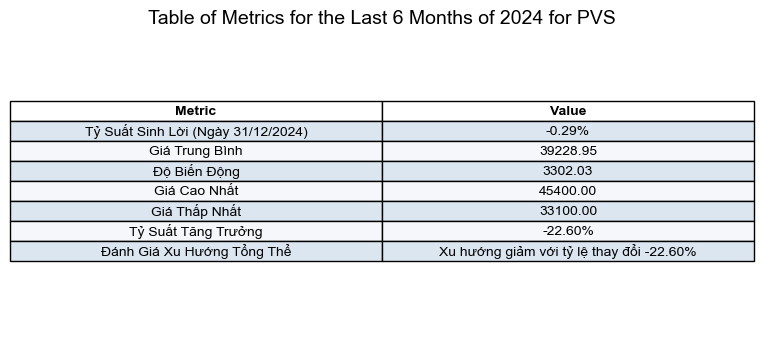

In [332]:

# # Tạo thư mục lưu ảnh nếu chưa tồn tại
# output_dir = "images/output"
# os.makedirs(output_dir, exist_ok=True)

# # Vẽ bảng dữ liệu
# fig, ax = plt.subplots(figsize=(8,4))  # Điều chỉnh kích thước ảnh
# ax.axis('tight')
# ax.axis('off')

# # Thêm tiêu đề nằm chính giữa phía trên bảng, cách bảng một khoảng
# plt.title("Table of Metrics for the Last 6 Months of 2024 for PVS", fontsize=14, pad=0, loc='center')

# # Vẽ bảng từ DataFrame
# table = ax.table(cellText=metric_6months.values, colLabels=metric_6months.columns, loc='center', cellLoc='left')

# # Định dạng bảng
# table.auto_set_font_size(False)
# table.set_fontsize(10)
# table.scale(1.2, 1.2)  # Điều chỉnh kích thước bảng

# # Màu xanh nhạt xen kẽ (giống bảng mẫu)
# header_color = '#FFFFFF'  # Màu trắng cho hàng tiêu đề
# row_color = '#F5F7FA'     # Màu nền trắng nhẹ cho các hàng
# alt_row_color = '#DCE6F1' # Màu xanh nhạt cho hàng xen kẽ

# # Căn lề trái cho cột "Metric" và căn phải cho cột "Value"
# for (row, col), cell in table.get_celld().items():
#     if row == 0:  # Hàng tiêu đề
#         cell.set_text_props(ha='center', fontweight='bold', color='black')  # Tiêu đề căn giữa
#         cell.set_facecolor(header_color)  # Màu trắng cho tiêu đề
#     elif row % 2 == 0:  # Hàng chẵn (dữ liệu)
#         cell.set_facecolor(row_color)  # Màu trắng nhẹ
#     else:  # Hàng lẻ (dữ liệu)
#         cell.set_facecolor(alt_row_color)  # Màu xanh nhạt

#     # Căn phải cho cột "Value" (cột thứ 2)
#     if col == 1:
#         cell.set_text_props(ha='center')
#     else:
#         cell.set_text_props(ha='center')

# # Lưu bảng dưới dạng ảnh
# file_name = os.path.join(output_dir, "metric_6months_colored.png")
# plt.savefig(file_name, format="png", dpi=300, bbox_inches='tight')
# print(f"Bảng đã được lưu tại {file_name}")

# # Hiển thị bảng
# plt.show()


Biểu đồ đã được lưu tại images/output\chart6.png


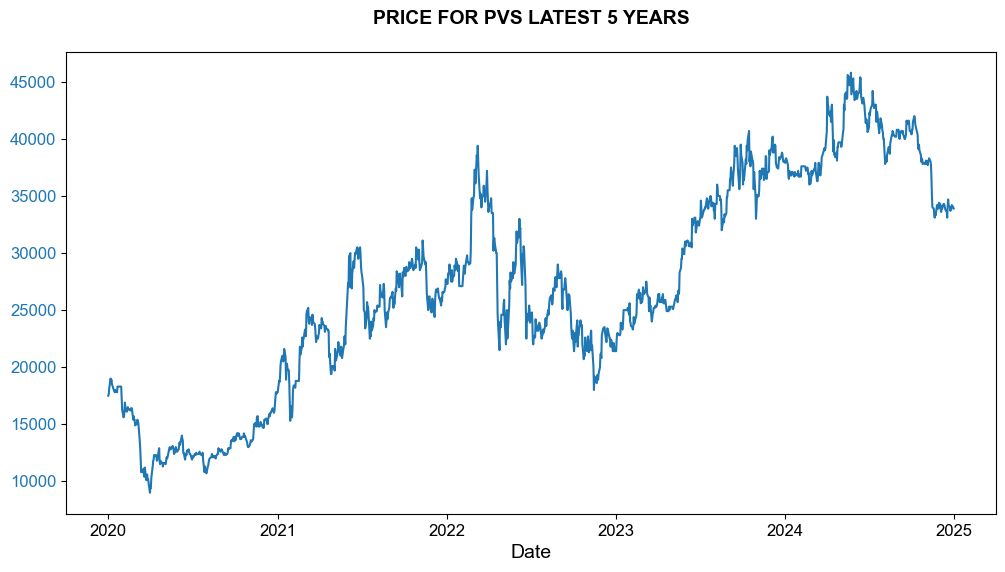

In [333]:
# Lọc dữ liệu theo khoảng thời gian từ 1/1/2024 đến 31/12/2024
dates = pd.to_datetime(price.columns[1:])  # Đảm bảo date là từ cột thứ 2 trở đi
start_date = pd.to_datetime('01/01/2020')
end_date = pd.to_datetime('12/31/2024')

# Tạo một mask với chiều dài đúng
date_mask = (dates >= start_date) & (dates <= end_date)

# Lọc dữ liệu của 'PVS' trong price và volume
filtered_price_data = price.loc[price['Code'] == 'PVS', price.columns[1:]].iloc[0]
filtered_volume_data = volume.loc[volume['Code'] == 'PVS', volume.columns[1:]].iloc[0]

# Áp dụng date_mask để chọn các cột ngày từ price và volume
filtered_price_data = filtered_price_data[date_mask]
filtered_volume_data = filtered_volume_data[date_mask]

# Loại bỏ những ngày không có dữ liệu (nghĩa là không có cột ngày trong cả price và volume)
valid_dates_mask = filtered_price_data.notna() & filtered_volume_data.notna()

# Chỉ lấy các ngày có dữ liệu
filtered_price_data = filtered_price_data[valid_dates_mask]
dates = dates[date_mask][valid_dates_mask]  # Cập nhật lại biến dates


# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ line cho price
ax1.plot(dates, filtered_price_data, color='tab:blue', label='Price')
ax1.set_xlabel('Date')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Tiêu đề giống mẫu
plt.title("PRICE FOR PVS LATEST 5 YEARS", fontsize=14, weight="bold", fontname="Arial", pad=20)

# Lưu biểu đồ
output_dir = "images/output"
os.makedirs(output_dir, exist_ok=True)
file_name = os.path.join(output_dir, "chart6.png")
plt.savefig(file_name, format="png", dpi=300)
print(f"Biểu đồ đã được lưu tại {file_name}")

In [334]:
# Định nghĩa khoảng thời gian
start_date = pd.to_datetime('01/01/2022')
end_date = pd.to_datetime('12/31/2024')
# Chọn dữ liệu cho mã cổ phiếu PVS
filtered_price_data = price.loc[price['Code'] == 'VCB', price.columns[1:]].iloc[0]
dates = pd.to_datetime(price.columns[1:])
# Lọc giá trị trong khoảng thời gian từ 01/01/2022 đến 31/12/2024
date_mask = (dates >= start_date) & (dates <= end_date)
filtered_price_data = filtered_price_data[date_mask]
dates = dates[date_mask]
# Tính các chỉ số
# 1. Tỷ Suất Sinh Lời Hàng Năm (CAGR)
price_start = filtered_price_data.iloc[0]  # Giá tại ngày đầu (01/01/2022)
price_end = filtered_price_data.iloc[-1]  # Giá tại ngày cuối (31/12/2024)
years = (end_date - start_date).days / 365.25
cagr = (price_end / price_start) ** (1 / years) - 1
# 2. Tỷ Suất Sinh Lời (YTD) cho ngày 31/12/2024
ytd_return = (price_end / filtered_price_data.iloc[0]) - 1
# 3. Độ Biến Động (Volatility)
volatility = np.std(filtered_price_data.pct_change()) * np.sqrt(252)  # Sử dụng giả định 252 ngày giao dịch/năm
# 4. Tỷ Suất Tăng Trưởng (Growth Rate)
growth_rate = (price_end / price_start) - 1
# Tạo DataFrame với các kết quả
metric_5years = pd.DataFrame({
    'Metric': [
        'Tỷ Suất Sinh Lời Hàng Năm (CAGR)',
        'Tỷ Suất Sinh Lời (YTD) cho ngày 31/12/2024',
        'Độ Biến Động (Volatility)',
        'Tỷ Suất Tăng Trưởng'
    ],
    'Value': [
        f"{cagr * 100:.2f}%",  # Tỷ suất sinh lời hàng năm
        f"{ytd_return * 100:.2f}%",  # Tỷ suất sinh lời YTD
        f"{volatility * 100:.2f}%",  # Độ biến động
        f"{growth_rate * 100:.2f}%"  # Tỷ suất tăng trưởng
    ]
})
# Hiển thị DataFrame
metric_5years




,Metric,Value
0,Tỷ Suất Sinh Lời Hàng Năm (CAGR),10.99%
1,Tỷ Suất Sinh Lời (YTD) cho ngày 31/12/2024,36.69%
2,Độ Biến Động (Volatility),22.57%
3,Tỷ Suất Tăng Trưởng,36.69%


Bảng đã được lưu tại images/output\metric_5years_colored.png


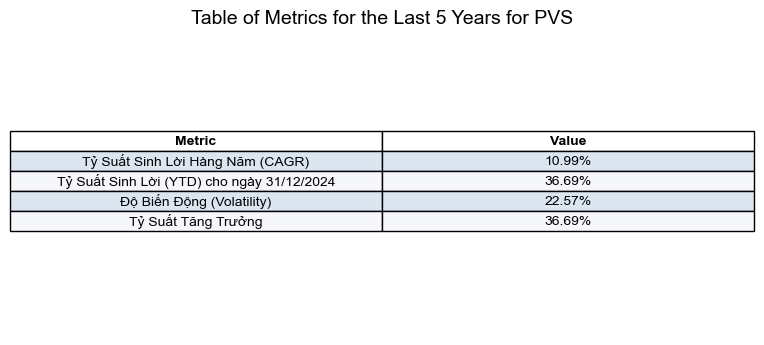

In [335]:
# import os
# import matplotlib.pyplot as plt

# # Tạo thư mục lưu ảnh nếu chưa tồn tại
# output_dir = "images/output"
# os.makedirs(output_dir, exist_ok=True)

# # Vẽ bảng dữ liệu
# fig, ax = plt.subplots(figsize=(8, 4))  # Điều chỉnh kích thước ảnh
# ax.axis('tight')
# ax.axis('off')

# # Thêm tiêu đề nằm chính giữa phía trên bảng, cách bảng một khoảng
# plt.title("Table of Metrics for the Last 5 Years for PVS", fontsize=14, pad=0, loc='center')

# # Vẽ bảng từ DataFrame
# table = ax.table(cellText=metric_5years.values, colLabels=metric_5years.columns, loc='center', cellLoc='left')

# # Định dạng bảng
# table.auto_set_font_size(False)
# table.set_fontsize(10)
# table.scale(1.2, 1.2)  # Điều chỉnh kích thước bảng

# # Màu sắc xen kẽ các hàng
# header_color = '#FFFFFF'  # Màu trắng cho hàng tiêu đề
# row_color = '#F5F7FA'     # Màu nền trắng nhẹ cho các hàng
# alt_row_color = '#DCE6F1' # Màu xanh nhạt cho hàng xen kẽ

# # Căn lề trái cho cột "Metric" và căn phải cho cột "Value"
# for (row, col), cell in table.get_celld().items():
#     if row == 0:  # Hàng tiêu đề
#         cell.set_text_props(ha='center', fontweight='bold', color='black')  # Tiêu đề căn giữa
#         cell.set_facecolor(header_color)  # Màu trắng cho tiêu đề
#     elif row % 2 == 0:  # Hàng chẵn (dữ liệu)
#         cell.set_facecolor(row_color)  # Màu trắng nhẹ
#     else:  # Hàng lẻ (dữ liệu)
#         cell.set_facecolor(alt_row_color)  # Màu xanh nhạt

#     # Căn giữa tất cả các cột
#     cell.set_text_props(ha='center')

# # Lưu bảng dưới dạng ảnh
# file_name = os.path.join(output_dir, "metric_5years_colored.png")
# plt.savefig(file_name, format="png", dpi=300, bbox_inches='tight')
# print(f"Bảng đã được lưu tại {file_name}")

# # Hiển thị bảng
# plt.show()


In [336]:
# Variables
today = dt.date.today()
company_name = transposed_df.iloc[1]['2024']
stock_symbol = transposed_df.iloc[0]['2024']
exchange_code = transposed_df.iloc[2]['2024']
icb1 = transposed_df.iloc[3]['2024']
icb2 = transposed_df.iloc[4]['2024']
icb3 = transposed_df.iloc[5]['2024']
icb4 = transposed_df.iloc[6]['2024']
industry = icb1 + " - " + icb2 + " - " + icb3 + ' - ' + icb4
print(company_name)
print(stock_symbol)
print(exchange_code)
print(industry)



# Lấy ngày hiện tại
today = datetime.date.today()

# Thông tin công ty
company_name = company_name
document_date = today.strftime('%d-%b-%Y')

# Lấy dữ liệu từ code trước (BALANCE SHEET)
total_current_assets = [f"{value:,.2f}" for value in total_current_assets]  
ppe = [f"{value:,.2f}" for value in ppe]
total_assets = [f"{value:,.2f}" for value in total_assets]
total_current_liabilities = [f"{value:,.2f}" for value in total_current_liabilities]
total_long_term_debt = [f"{value:,.2f}" for value in total_long_term_debt]
total_liabilities = [f"{value:,.2f}" for value in total_liabilities]

# Lấy dữ liệu từ code trước (FUNDAMENTAL) 
ebitda = [f"{value:,.2f}" for value in ebitda]  

# Lấy dữ liệu mới (INCOME STATEMENT)
revenue = [f"{value:,.2f}" for value in revenue]
total_operating_expense = [f"{value:,.2f}" for value in total_operating_expense]
net_income_before_taxes = [f"{value:,.2f}" for value in net_income_before_taxes]
net_income_after_taxes = [f"{value:,.2f}" for value in net_income_after_taxes]
net_income_before_extraordinary_items = [f"{value:,.2f}" for value in net_income_before_extraordinary_items]

# Lấy dữ liệu mới (PROFITABILITY ANALYSIS)
roe = [f"{value * 100:,.2f}" for value in roe]
roa = [f"{value * 100:,.2f}" for value in roa]
income_after_tax_margin = [f"{value * 100:,.2f}" for value in income_after_tax_margin]
revenue_to_total_assets = [f"{value * 100:,.2f}" for value in revenue_to_total_assets]
long_term_debt_to_equity = [f"{value * 100:,.2f}" for value in long_term_debt_to_equity]
total_debt_to_equity = [f"{value * 100:,.2f}" for value in total_debt_to_equity]
ros = [f"{value * 100:,.2f}" for value in ros]

# Dữ liệu bảng
balance_sheet_data = {
    "Total Current Assets": total_current_assets,
    "Property/Plant/Equipment": ppe,
    "Total Assets": total_assets,
    "Total Current Liabilities": total_current_liabilities,
    "Total Long-Term Debt": total_long_term_debt,
    "Total Liabilities": total_liabilities
}

fundamental_data = {
    "EBITDA": ebitda
}

income_statement_data = {
    "Revenue": revenue,
    "Total Operating Expense": total_operating_expense,
    "Net Income Before Taxes": net_income_before_taxes,
    "Net Income After Taxes": net_income_after_taxes,
    "Net Income Before Extra. Items": net_income_before_extraordinary_items
}

profitability_analysis_data = {
    "ROE Tot Equity, %": roe,
    "ROA Tot Assets, %": roa,
    "Income Aft Tax Margin, %": income_after_tax_margin,
    "Revenue/Tot Assets, %": revenue_to_total_assets,
    "Long Term Debt/Equity, %": long_term_debt_to_equity,
    "Total Debt/Equity, %": total_debt_to_equity,
    "ROS, %": ros
}

years = list(transposed_df.columns[1:])  # Danh sách năm từ transposed_df


from fpdf import FPDF
import datetime

# Lấy ngày hiện tại
today = datetime.date.today()

data = (
    ("Company name", company_name),
    ("Exchang Code", exchange_code),
    ("Industry (ICB)", "Dầu khí, Dịch vụ và Phân phối Dầu khí - Thiết bị và Dịch vụ Dầu khí"),
    ("Market capitalization", "15.96T ‬VND"),
    ("Website", "http://ptsc.com.vn/"),
    ("Link github", "https://github.com/HaNgocDao/GPM1")
)

years = list(transposed_df.columns[1:])  # Danh sách năm từ transposed_df


DVKT Dầu khí PTSC
PVS
HNX
Dầu khí - Dầu khí - Thiết bị, Dịch vụ và Phân phối Dầu khí - Thiết bị và Dịch vụ Dầu khí


# Create PDF

In [337]:
from fpdf import FPDF
from datetime import datetime

today = datetime.today()

class PDF(FPDF):
    def header(self):
        # Thêm phông chữ Unicode (DejaVu Sans) với hỗ trợ Unicode
        self.add_font('DejaVu', '', 'DejaVuSans.ttf', uni=True)
        self.add_font('DejaVu', 'B', 'DejaVuSans-Bold.ttf', uni=True)
        self.add_font('DejaVu', 'I', 'DejaVuSans-Oblique.ttf', uni=True)
        self.set_font('DejaVu', 'B', 14)
        self.cell(0, 12, "DVKT DẦU KHÍ PTSC", 0, 1, 'R')

        self.set_font('DejaVu', 'B', 12)
        self.cell(0, 5, "Analyst: Đào Ngọc Hà", 0, 1, 'R')

        self.set_font('DejaVu', '', 10)
        self.cell(0, 5, f"Document Date: {today.strftime('%d-%b-%Y')}", 0, 1, 'R')
        self.ln(6)

        self.set_line_width(0.75)
        self.set_draw_color(10, 100, 240)
        self.line(10, self.get_y(), 200, self.get_y())
        self.ln(3)

    def footer(self):
        self.set_y(-15)
        self.set_font('DejaVu', 'I', 8)
        self.cell(0, 5, f'Page {self.page_no()} of {{nb}}', 0, 1, 'C')

    def chapter_title(self, title):
        self.set_text_color(10, 100, 240)
        self.set_font('DejaVu', 'B', 12)
        self.cell(0, 5, title, 0, 1, 'L')
        self.ln(1)

    def create_table(self, data):
        self.set_text_color(0, 0, 0)
        row_count = 0
        for item in data:
            self.set_fill_color(230, 240, 250) if row_count % 2 == 0 else self.set_fill_color(255, 255, 255)
            self.set_font('DejaVu', '', 9)
            self.cell(50, 6, item[0], 0, 0, 'L', fill=True)
            self.cell(140, 6, item[1], 0, 1, 'L', fill=True)
            row_count += 1
        self.ln(2)

        # # Thêm tiêu đề "BUSINESS SUMMARY"
        # self.set_text_color(10, 100, 240)
        # self.set_font('DejaVu', 'B', 12)
        # self.cell(0, 5, "BUSINESS SUMMARY", 0, 1, 'L')
        # self.ln(2)

        # # Thêm nội dung giới thiệu PV Drilling
        # self.set_text_color(0, 0, 0)
        # self.set_font('DejaVu', '', 9)
        # intro_text = (
        #     "Petrovietnam Technical Services Corporation (PVS) is a leading provider of specialized technical services "
        #     "to the oil and gas industry in Vietnam and internationally. It provides marine transportation, equipment "
        #     "handling, wharfage, bunkering, and repair services. With a strong track record and extensive experience, "
        #     "PVS plays a crucial role in supporting the development and operation of the oil and gas sector, contributing "
        #     "significantly to Vietnam's energy security and economic growth. The company was founded on February 9, 1993 "
        #     "and is headquartered in Ho Chi Minh City, Vietnam."
        # )
        # self.multi_cell(0, 6, intro_text)
        # self.ln(2)

    def create_financial_table(self, title, data, years):
        self.set_font("DejaVu", "B", 12)
        self.set_text_color(10, 100, 240)
        self.cell(0, 10, title, 0, 1, "L")
        self.ln(2)

        self.set_font("DejaVu", "B", 10)
        self.set_text_color(10, 100, 240)
        col_width = 50
        year_width = 28
        total_width = col_width + len(years) * year_width
        margin_x = (210 - total_width) / 2
        self.set_x(margin_x)

        # Thiết lập màu đường kẻ (border)
        self.set_draw_color(217, 217, 217)
        self.set_fill_color(255, 255, 255)
        self.cell(col_width, 8, "", 1, 0, "C", fill=True)
        for year in years:
            self.cell(year_width, 8, year, 1, 0, "R", fill=True)
        self.ln()

        self.set_x(margin_x)
        self.set_font("DejaVu", "", 9)
        self.set_text_color(0, 0, 0)

        row_count = 0
        for key, values in data.items():
            self.set_fill_color(230, 240, 250) if row_count % 2 == 0 else self.set_fill_color(255, 255, 255)
            self.cell(col_width, 8, key, 1, 0, "L", fill=True)
            for value in values:
                self.cell(year_width, 8, value, 1, 0, "R", fill=True)
            self.ln()
            row_count += 1
        self.ln(5)


In [338]:
# Khởi tạo đối tượng PDF
pdf = PDF()
pdf.alias_nb_pages()
pdf.add_page()

### ===== TRANG 1 =====

# --- Tiêu đề GENERAL INFORMATION ---
pdf.chapter_title("GENERAL INFORMATION")
pdf.create_table(data)

# --- Tiêu đề BUSINESS SUMMARY ---
pdf.chapter_title("BUSINESS SUMMARY")

# --- Đoạn mô tả công ty ---
pdf.set_text_color(0, 0, 0)
pdf.set_font('DejaVu', '', 9)
summary_text = (
    "Petrovietnam Technical Services Corporation (PVS) is a leading provider of specialized technical services to the oil "
    "and gas industry in Vietnam and internationally. The company was founded on February 9,1993 in Ho Chi Minh City, Vietnam. "
    "It provides marine transportation, equipment handling, and repair services. PVS plays a crucial role in "
    "supporting the development contributing significantly to Vietnam's energy "
    "security and economic growth."
)
pdf.multi_cell(0, 6, summary_text, align='J')
pdf.ln(4)

# --- Chèn 2 ảnh chart5 và chart6 cạnh nhau ---
img_width = 95
img_height = 90
spacing_x = 5
margin_side = 8

x1 = margin_side
x2 = x1 + img_width + spacing_x
y_top = pdf.get_y() + 2  # lấy vị trí hiện tại sau phần text

pdf.image('images/output/chart5.png', x=x1, y=y_top, w=img_width, h=img_height)
pdf.image('images/output/chart6.png', x=x2, y=y_top, w=img_width, h=img_height)

# --- Chèn tiêu đề "Stock price trends and market sentiment" ---
y_text = y_top + img_height + 6
pdf.set_y(y_text)

text_width = 180
x_text = (pdf.w - text_width) / 2
pdf.set_x(x_text)

pdf.set_text_color(10, 100, 240)
pdf.set_font('DejaVu', 'B', 12)
pdf.multi_cell(text_width, 6, "Stock price trends and market sentiment:", align='J')
pdf.ln(2)

# --- Đoạn mô tả dữ liệu biểu đồ ---
pdf.set_text_color(0, 0, 0)
pdf.set_font('DejaVu', '', 9)

market_text = (
    "In the last six months of 2024, PVS stock experienced a significant downtrend (-22.80%), declining from its peak of 45,400 VND to 33,100 VND by year-end. "
    "The stock exhibited substantial volatility (3,302 VND), predominantly on the downside, reflecting increased selling pressure. "
    "During Q4/2024, the sharp decline was driven by cautious market sentiment amid uncertainties in the oil and gas sector and unclear business prospects. "
    "A return on investment of -0.29% indicates weak investment performance. Liquidity weakened, and there were no signs of capital inflows, highlighting investor caution."
)
pdf.set_x(x_text)
pdf.multi_cell(text_width, 6, market_text, align='J')
pdf.ln(2)


##page3

pdf.add_page()

pdf.chapter_title("FINANCIAL SUMMARY")
##
# Chèn đoạn đánh giá tổng quan tài chính của PVS
pdf.set_text_color(0, 0, 0)
pdf.set_font('DejaVu', '', 9)

fin_text = (
    "As of 31/12/2024, PVS maintained stable growth with rising revenue and profits "
    "from 2020 to 2024. However, by year-end, the stock saw a sharp decline amid sector "
    "uncertainty. Debt levels surged in 2024, raising concerns about financial risk."
)

pdf.multi_cell(0, 6, fin_text)
pdf.ln(2)
##
# Trang 3Thêm các bảng tài chính ngay dưới GENERAL INFORMATION
pdf.create_financial_table("BALANCE SHEET", balance_sheet_data, years)

# Trang 1: GENERAL INFORMATION + Các bảng tài chính trên cùng một trang
pdf.chapter_title("AI ANALYSIS FOR BALANCE SHEET")

# Chèn đoạn đánh giá bảng cân đối kế toán của PVS
pdf.set_text_color(0, 0, 0)
pdf.set_font('DejaVu', '', 9)

balance_sheet_text = (
    "Okay, here's an assessment of the company's financial position based on the chart data: "
    "Overall, the balance sheet of PVS indicates a company with a growing asset base and a relatively stable equity position. "
    "Total assets have shown a general upward trend over the period, with a notable increase in the most recent year. "
    "The company maintains a substantial portion of its assets in current assets, which is a positive sign for short-term liquidity. "
    "However, the growth in current liabilities is also evident, particularly in the latest year, which could warrant monitoring."
    "The level of long-term debt has seen a gradual increase, which should be assessed in relation to the company's earnings. "
    "A comprehensive analysis would require comparing these figures with industry benchmarks and examining the company's income statement "
    "and cash flow statement to provide a more holistic view of its financial health."
)

pdf.multi_cell(0, 6, balance_sheet_text)
pdf.ln(2)


# Tại trang 4+ Chèn bảng FUNDAMENTAL


pdf.create_financial_table("INCOME STATEMENT", income_statement_data, years)
##
pdf.add_page()
pdf.chapter_title("AI ANALYSIS FOR INCOME STATEMENT")

# Chèn đoạn đánh giá bảng cân đối kế toán của PVS
pdf.set_text_color(0, 0, 0)
pdf.set_font('DejaVu', '', 9)

income_statement_text = (
    "Okay, here's an assessment of the company's financial position based on the chart data: "
    "The income statement of PVS reflects a positive trend in revenue growth over the five-year period, "
    "with a significant increase in 2024 indicating a strong rebound in business activity. "
    "Total operating expenses have also risen, but at a manageable pace, suggesting that the company is maintaining control over its cost structure. "
    "Net income before and after taxes has improved steadily, demonstrating enhanced profitability and operational efficiency. "
    "Notably, the sharp increase in net income before extraordinary items in 2024 highlights a robust performance in core operations. "
    "These improvements suggest that PVS is on a sustainable growth trajectory, although continued monitoring of expense levels will be essential "
    "to ensure long-term earnings quality and resilience against external market pressures."
)

pdf.multi_cell(0, 6, income_statement_text)
pdf.ln(2)
#
pdf.create_financial_table("PROFITABILITY ANALYSIS", profitability_analysis_data, years)

pdf.chapter_title("AI ANALYSIS FOR PROFITABILITY ANALYSIS")

# Chèn đoạn đánh giá bảng cân đối kế toán của PVS
pdf.set_text_color(0, 0, 0)
pdf.set_font('DejaVu', '', 9)

profitability_analysis_text = (
    "Okay, here's an assessment of the company's financial position based on the chart data: "
    "The income statement of PVS reflects a positive trend in revenue growth over the five-year period, "
    "with a significant increase in 2024 indicating a strong rebound in business activity. "
    "Total operating expenses have also risen, but at a manageable pace, suggesting that the company is maintaining control over its cost structure. "
    "Net income before and after taxes has improved steadily, demonstrating enhanced profitability and operational efficiency. "
    "Notably, the sharp increase in net income before extraordinary items in 2024 highlights a robust performance in core operations. "
    "These improvements suggest that PVS is on a sustainable growth trajectory, although continued monitoring of expense levels will be essential "
    "to ensure long-term earnings quality and resilience against external market pressures."
)

pdf.multi_cell(0, 6, profitability_analysis_text)
pdf.ln(2)

pdf.create_financial_table("FUNDAMENTAL", fundamental_data, years)
#
##

# Trang only: ICB12, ICB34
pdf.add_page()

img_width = 170  # giảm chiều rộng để không bị cắt
img_height = 95  # giảm chiều cao vừa phải

# Vị trí x căn giữa
x_center = (pdf.w - img_width) / 2

# Căn y cho ảnh đầu tiên, giữ khoảng cách top hợp lý (ví dụ 30)
y1 = 30

# Căn y cho ảnh thứ hai phía dưới
y2 = 45 + img_height + 5  # khoảng cách giữa 2 ảnh là 10

# Chèn ảnh đầu tiên (ICB12)
pdf.image('images/output/ICB12.png', x=x_center, y=45, w=img_width, h=img_height)

# Chèn ảnh thứ hai (ICB34)
pdf.image('images/output/ICB34.png', x=x_center, y=y2, w=img_width, h=img_height)

# Cập nhật lại vị trí Y cho phần text sau khi đã có 2 ảnh
y_text = y2 + img_height + 5  # 5 là khoảng cách giữa ảnh và text
pdf.set_y(y_text)

# Tiêu đề đoạn mô tả
pdf.set_text_color(10, 100, 240)  # Màu xanh navy
pdf.set_font('DejaVu', 'B', 12)
# pdf.multi_cell(text_width, 5, "ICB Sector Allocation – PVS Industry Positioning", align='J')
pdf.multi_cell(0, 6, "ICB Sector Allocation – PVS Industry Positioning", align='J')

# Nội dung mô tả
pdf.set_text_color(0, 0, 0)
pdf.set_font('DejaVu', '', 9)

intro_text = (
    "The image shows the sector weight distribution across ICB Levels 1 to 4, "
    "highlighting that the Industry – Oil & Gas sector (where PVS operates) holds a relatively small share of the overall market. "
    "This indicates that PVS operates in a highly specialized and cyclical industry, "
    "which carries higher risks but also offers significant profit potential."
)

pdf.multi_cell(0, 6, intro_text, align='J')
# pdf.set_x(x_text)
# pdf.multi_cell(text_width, 5, intro_text, align='J')
pdf.ln(2)

# # Trang 4: chart 1 và 2
# pdf.add_page()

# # Tính toán vị trí cho ảnh sao cho chúng căn giữa và không chồng lên nhau
# # Kích thước ảnh mới lớn hơn
# img_width = 130  # Điều chỉnh kích thước ảnh rộng hơn
# img_height = 95  # Điều chỉnh chiều cao ảnh

# # Vị trí x để căn giữa ảnh trên trang
# x_center = (pdf.w - img_width) / 2

# # Chèn ảnh đầu tiên (ICB3)
# pdf.image('images/output/chart1.png', x=x_center, y=40, w=img_width, h=img_height)

# # Chèn ảnh thứ hai (ICB4) dưới ảnh đầu tiên
# pdf.image('images/output/chart2.png', x=x_center, y= 40 + img_height + 10  , w=img_width, h=img_height)
# Trang 4: chart 1 và 2
pdf.add_page()

# Kích thước ảnh
img_width = 120
img_height = 90

# Tính vị trí căn giữa ảnh
x_center = (pdf.w - img_width) / 2

# Chèn ảnh đầu tiên (chart1)
pdf.image('images/output/chart1.png', x=x_center, y=40, w=img_width, h=img_height)

# Chèn ảnh thứ hai (chart2) bên dưới ảnh đầu tiên
y_chart2 = 40 + img_height + 10
pdf.image('images/output/chart2.png', x=x_center, y=y_chart2, w=img_width, h=img_height)

# Tính vị trí Y sau ảnh thứ hai để chèn đoạn văn mô tả
y_after_chart2 = y_chart2 + img_height + 5
pdf.set_y(y_after_chart2)

# Thiết lập font và màu cho đoạn mô tả
pdf.set_text_color(0, 0, 0)
pdf.set_font('DejaVu', '', 9)

# Nội dung mô tả
chart12_text = (
    "PVS has maintained strong revenue growth and significantly expanded its total assets. "
    "The asset structure has become more flexible, with a higher proportion of current assets. "
    "However, the slower growth in equity compared to total assets could be a potential long-term financial risk."
)

pdf.multi_cell(0, 6, chart12_text, align='J')
pdf.ln(2)

# # Trang 5: chart 3 và 4
# pdf.add_page()

# # Tính toán vị trí cho ảnh sao cho chúng căn giữa và không chồng lên nhau
# # Kích thước ảnh mới lớn hơn
# img_width = 120  # Điều chỉnh kích thước ảnh rộng hơn
# img_height = 90 # Điều chỉnh chiều cao ảnh

# # Vị trí x để căn giữa ảnh trên trang
# x_center = (pdf.w - img_width) / 2

# # Chèn ảnh đầu tiên (Chart 3)
# pdf.image('images/output/chart3.png', x=x_center, y=45, w=img_width, h=img_height)

# # Chèn ảnh thứ hai (Chart 4) dưới ảnh đầu tiên
# pdf.image('images/output/chart4.png', x=x_center, y=45 + img_height + 4, w=img_width, h=img_height)

# Trang 5: chart 3 và 4
pdf.add_page()

# Kích thước ảnh
img_width = 120
img_height = 90

# Tính vị trí căn giữa ảnh
x_center = (pdf.w - img_width) / 2

# Chèn ảnh đầu tiên (Chart 3)
y_chart3 = 45
pdf.image('images/output/chart3.png', x=x_center, y=y_chart3, w=img_width, h=img_height)

# Chèn ảnh thứ hai (Chart 4) dưới ảnh đầu tiên
y_chart4 = y_chart3 + img_height + 4
pdf.image('images/output/chart4.png', x=x_center, y=y_chart4, w=img_width, h=img_height)

# Tính vị trí Y sau ảnh thứ hai để chèn đoạn mô tả
y_after_chart4 = y_chart4 + img_height + 5
pdf.set_y(y_after_chart4)

# Thiết lập font và màu cho đoạn mô tả
pdf.set_text_color(0, 0, 0)
pdf.set_font('DejaVu', '', 9)

# Nội dung nhận xét
chart34_text = (
    "PVS has demonstrated steady growth in equity and improved profitability, as shown by the rising ROE and ROA over the years. "
    "Revenue and net profit after tax have also increased, with the income after tax margin improving consistently from 3.5% in 2020 to 5.9% in 2024. "
    "This indicates enhanced operational efficiency and profitability. However, the pace of equity growth has accelerated notably in 2024, "
    "which may suggest increased reinvestment or retained earnings but should be monitored to ensure sustainable returns."
)

pdf.multi_cell(0, 6, chart34_text, align='J')
pdf.ln(2)

##
# Trang chart7
pdf.add_page()
# Tiêu đề chương
pdf.chapter_title("ANALYSIS FOR TOTAL DEBIT VS D/E RATIO")

# Kích thước ảnh
img_width = 120
img_height = 100

# Tính x để căn giữa ảnh
x_center = (pdf.w - img_width) / 2
y_image_top = 48

# Chèn ảnh đầu tiên (Chart 7)
pdf.image('images/output/chart7.png', x=x_center, y=y_image_top, w=img_width, h=img_height)

# Tính vị trí Y sau ảnh để chèn tiêu đề và đoạn văn
y_after_image = y_image_top + img_height + 5  # thêm khoảng cách 5 đơn vị sau ảnh

# Di chuyển con trỏ đến vị trí dưới ảnh
pdf.set_y(y_after_image)



# Thiết lập font và màu chữ cho phần nội dung
pdf.set_text_color(0, 0, 0)
pdf.set_font('DejaVu', '', 9)

# Đoạn văn phân tích
intro_text = (
    "Okay, here's an assessment of the company's financial position based on the chart data: "
    "Overall, the company's debt profile remained relatively stable from 2020 to 2023, with total debt showing only slight fluctuations. "
    "The consistent level of debt during this period suggests prudent financial management and a balanced capital structure. "
    "The D/E ratio also stayed below 100% during these years, indicating that the company maintained a healthy level of leverage and did not overly rely on borrowed capital.\n\n"
    "However, in 2024, there is a significant shift, with both total debt and the D/E ratio rising sharply. "
    "This surge may point to increased borrowing, possibly for business expansion, but it could also reflect cash flow constraints that necessitated higher external financing. "
    "The steep increase in the D/E ratio, reaching nearly 130%, may raise concerns about the company’s financial risk and debt-servicing ability. "
    "This development warrants further analysis in the context of the company’s profitability and cash flow performance to determine whether it can sustainably support the higher debt load. "
    "While the increase in debt might be strategic, the long-term implications for financial health depend on whether the company’s earnings and operational performance can keep pace. "
    "A more comprehensive evaluation would benefit from reviewing additional financial statements such as the income statement and cash flow statement, "
    "as well as comparing the company’s leverage ratios with industry peers."
)

# In ra phần nội dung bên dưới chart
pdf.multi_cell(0, 6, intro_text)
pdf.ln(2)

#

# Trang 1: GENERAL INFORMATION + Các bảng tài chính trên cùng một trang
pdf.chapter_title("DISCLAIMER")

# Chèn đoạn đánh giá bảng cân đối kế toán của PVS
pdf.set_text_color(0, 0, 0)
pdf.set_font('DejaVu', '', 9)

intro_text = (
    "The information, statements and projections contained in this report, including personal opinions, are based on sources believed to be reliable, "
    "but the Group does not guarantee the accuracy or completeness of such sources of information. The opinions contained in this report are based on detailed "
    "and careful analysis and, in our opinion, are reasonable at the time of publication. The opinions contained in this report are subject to change at any time without notice. "
    "This report should not be construed as an offer to buy or sell any securities. The Group and its subsidiaries, as well as their directors and employees, may have interests "
    "in companies mentioned in this report. The Group may have provided, is providing, or will continue to provide services to the companies mentioned in this report. "
    "The Group shall not be liable for any or all damages or alleged damages resulting from the use of all or any information or opinions contained in this report. "
    "The Group strictly prohibits the use, and any printing, copying or publication of the Report in whole or in part for any purpose without the Group’s prior written consent."
)

pdf.multi_cell(0, 6, intro_text)
pdf.ln(2)

###
# Thiết lập font và kích thước chữ
pdf.set_font('DejaVu', '', 10)
pdf.set_text_color(0, 0, 0)

# Tạo tên file PDF với định dạng "FINAL_REPORT - TÊN CÔNG TY (MÃ CHỨNG KHOÁN).pdf"
pdf_filename = f"{stock_symbol}_Fundamental Analysis Report.pdf" 


# Import PDF

In [339]:
# Xuất file PDF
pdf.output(pdf_filename)
print(f"PDF file created successfully: {pdf_filename}")

import os
os.startfile(f"{stock_symbol}_Fundamental Analysis Report.pdf")

PDF file created successfully: PVS_Fundamental Analysis Report.pdf
